In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

In [15]:
evds=evdsAPI('dsIC3fiGlu')


In [16]:
import yfinance as yf 


In [17]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd.iloc[-1,1]=yf.download(tickers='USDTRY=X',interval='1m')["Adj Close"][-1]
usd

[*********************100%%**********************]  1 of 1 completed


,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.326300
1,02-02-2006,1.324100
2,03-02-2006,1.327700
3,06-02-2006,1.325700
4,07-02-2006,1.329600
...,...,...
4723,11-03-2024,31.919200
4724,12-03-2024,31.995300
4725,13-03-2024,32.043200
4726,14-03-2024,32.096700


In [18]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()
usd



,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750


In [19]:
enf=evds.get_data(["TP.FE.OKTG01"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FE_OKTG01
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
212,2023-10,1749.11
213,2023-11,1806.50
214,2023-12,1859.38
215,2024-1,1984.02


In [20]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [21]:

inflation=enf
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
212,2023-10,1749.11
213,2023-11,1806.50
214,2023-12,1859.38
215,2024-1,1984.02


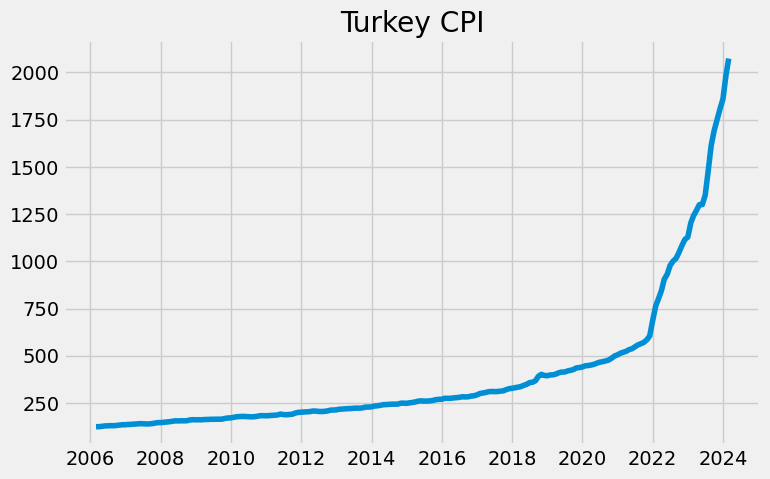

In [22]:
dates=pd.date_range(start="2006-02-28",periods=len(enf) , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure(figsize=(8,5))
plt.title("Turkey CPI")
plt.plot(df)
plt.show()


In [23]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6.iloc[-1,0]=32
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750


In [24]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del money["YEARWEEK"]
money=pd.DataFrame(money)
money.columns=["Tarih","Para Arzi"]
money=money.set_index(pd.to_datetime(money["Tarih"], format='%d-%m-%Y'))
del money["Tarih"]
money=money.resample('M').last()
money=money.pct_change(1)*100
money=money.dropna()
money

,Para Arzi
Tarih,
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2023-11-30,2.245991
2023-12-31,4.333376
2024-01-31,0.993354


In [25]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del m3["YEARWEEK"]
m3=pd.DataFrame(m3)
m3.columns=["Tarih","M3"]
m3=m3.set_index(pd.to_datetime(m3["Tarih"], format='%d-%m-%Y'))
del m3["Tarih"]
m3

,M3
Tarih,
2006-01-06,2.644879e+08
2006-01-13,2.650229e+08
2006-01-20,2.594222e+08
2006-01-27,2.605798e+08
2006-02-03,2.600928e+08
...,...
2024-02-09,1.420413e+10
2024-02-16,1.438121e+10
2024-02-23,1.451008e+10


In [26]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del m3["YEARWEEK"]
m3=pd.DataFrame(m3)
m3.columns=["Tarih","M3"]
m3=m3.set_index(pd.to_datetime(m3["Tarih"], format='%d-%m-%Y'))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2023-11-30,2.464258
2023-12-31,4.417846
2024-01-31,1.120968


In [27]:

issizlik=evds.get_data(["TP.TIG08"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del issizlik["Tarih"]
issizlik.columns=["İşsizlik"]
issizlik=issizlik.dropna(axis=0)
issizlik=issizlik.set_index(pd.date_range(start="2014-01-30",periods=len(issizlik),freq="1M"))
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-09-30,9.1
2023-10-31,8.6
2023-11-30,9.0
2023-12-31,8.9


In [28]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2023-11-30,82.027727
2023-12-31,77.324000
2024-01-31,79.197143


In [29]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del kredi["Tarih"]
del kredi["YEARWEEK"]
kredi=kredi.set_index(pd.date_range(start="2006-02-03",periods=len(kredi),freq="W"))
kredi.columns=["Kredi"]
kredi=(kredi.pct_change(4)*100).dropna()
kredi=kredi.resample('M').last()
kredi

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261


In [30]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=pd.date_range(start="2006-03-28",periods=len(df3),freq="1M")
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.set_index(pd.date_range('2006-03-28',periods=len(df3) , freq='1M'))
df3

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261


In [31]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
#pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
213,2023-11,41.09
214,2023-12,42.50
215,2024-1,44.00
216,2024-2,45.00


In [32]:
dates=pd.date_range('2006-02-28',periods=len(pfaiz) , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2006-02-28,17.50
2006-03-31,17.50
2006-04-30,17.50
2006-05-31,17.50
2006-06-30,17.50
...,...
2023-11-30,41.09
2023-12-31,42.50
2024-01-31,44.00


In [33]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
del kfaiz["Tarih"]
del kfaiz["YEARWEEK"]
kfaiz=kfaiz.set_index(pd.date_range(start="2006-02-01",periods=len(kfaiz),freq="1W"))
kfaiz=kfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])
kfaiz.columns=["Kredi Faizi"]
kfaiz

,Kredi Faizi
2006-02-28,17.02
2006-03-31,16.88
2006-04-30,15.84
2006-05-31,16.60
2006-06-30,20.35
...,...
2023-11-30,58.61
2023-12-31,58.16
2024-01-31,59.41
2024-02-29,59.02


In [34]:
perakende=pd.read_excel("./perakende satis hacim endeksi ve degisim oranlari (sabit fiyatlarla) (2015=100).xls")
perakende1=perakende.iloc[5:,2].dropna(axis=0).astype(float)
perakende1=pd.DataFrame(perakende1)
perakende1.columns=["Arındırılmamış"]


perakende1["Takvimden Arındırılmış"]=perakende.iloc[5:,4].astype(float)
perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]=perakende.iloc[5:,7].astype(float)
perakende1=perakende1.set_index(pd.date_range(start="2010-01-01",periods=len(perakende1),freq="1M"))
perakende1

,Arındırılmamış,Takvimden Arındırılmış,Mevsimsellikten ve Takvimden Arındırılmış
2010-01-31,57.403841,57.747949,67.560585
2010-02-28,57.317027,57.179176,68.192727
2010-03-31,67.904361,67.034985,69.536955
2010-04-30,67.048510,66.458455,70.175625
2010-05-31,70.327428,70.614865,70.604236
...,...,...,...
2023-08-31,185.330997,183.564524,176.254302
2023-09-30,184.673020,183.157065,174.785903
2023-10-31,182.582955,180.947621,178.237289
2023-11-30,183.908595,182.048518,178.930674


In [35]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-10-31,38.900000
2023-11-30,37.680000
2023-12-31,36.420000
2024-01-31,39.450000


In [36]:
sanayi=pd.read_excel("./sanayi uretim endeksi ve degisim oranlari (2015=100).xls")
sanayi=pd.DataFrame(sanayi.iloc[8:,5])
sanayi.columns=["Sanayi"]
sanayi=sanayi.set_index(pd.date_range(start="2005-02-08",periods=len(sanayi),freq="1M"))
sanayi=sanayi.dropna()
sanayi=sanayi.astype(float)
sanayi

,Sanayi
2005-02-28,57.747916
2005-03-31,57.058754
2005-04-30,57.685141
2005-05-31,58.226534
2005-06-30,58.022939
...,...
2023-08-31,146.075796
2023-09-30,145.853837
2023-10-31,145.491300
2023-11-30,143.444185


In [37]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="03-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
#mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-01",end="2024-01-01",freq="1M"))
del mfaiz["YEARWEEK"]
del mfaiz["Tarih"]
mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-03",periods=len(mfaiz),freq="W"))
mfaiz=mfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])

mfaiz.columns=["Mevduat Faizi"]
mfaiz

,Mevduat Faizi
2006-02-28,15.70
2006-03-31,14.84
2006-04-30,14.87
2006-05-31,14.84
2006-06-30,15.57
...,...
2023-11-30,46.07
2023-12-31,52.50
2024-01-31,49.61
2024-02-29,51.89


In [38]:
from datetime import date
enf_belirsizlik=evds.get_data(["TP.BEK.S01.E.S"],startdate="30-06-2013",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2013-06-30",periods=len(enf_belirsizlik),freq="1M"))
del enf_belirsizlik["Tarih"]
enf_belirsizlik.columns=["Enflasyon Belirsizliği"]
enf_belirsizlik

,Enflasyon Belirsizliği
2013-06-30,0.62
2013-07-31,0.74
2013-08-31,0.74
2013-09-30,0.77
2013-10-31,0.65
...,...
2023-11-30,4.49
2023-12-31,3.36
2024-01-31,3.50
2024-02-29,3.41


In [39]:
borc=evds.get_data(["TP.KB.A09"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del borc["Tarih"]
borc=borc.set_index(pd.date_range(start="2006-01-01",periods=len(borc),freq="1M"))
borc.columns=["Borç"]
borc

,Borç
2006-01-31,2.435600e+08
2006-02-28,2.464270e+08
2006-03-31,2.463600e+08
2006-04-30,2.466640e+08
2006-05-31,2.507320e+08
...,...
2023-09-30,2.859751e+09
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09


In [271]:
redk=evds.get_data(["TP.RK.U01.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redk["Tarih"]
redk=redk.set_index(pd.date_range(start="2011-03-30",periods=len(redk),freq="1M"))
redk.columns=["REDK"]
redk

,REDK
2011-03-31,105.42
2011-04-30,107.10
2011-05-31,103.79
2011-06-30,101.84
2011-07-31,98.49
...,...
2023-10-31,89.18
2023-11-30,87.41
2023-12-31,86.37
2024-01-31,87.20


In [272]:
redkt=evds.get_data(["TP.RK.T1.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redkt["Tarih"]
redkt=redkt.set_index(pd.date_range(start="2011-03-30",periods=len(redkt),freq="1M"))
redkt.columns=["REDKT"]
redkt

,REDKT
2011-03-31,111.62
2011-04-30,114.17
2011-05-31,112.89
2011-06-30,108.98
2011-07-31,104.82
...,...
2023-10-31,56.06
2023-11-30,55.29
2023-12-31,55.33
2024-01-31,57.12


In [42]:
beklenti=evds.get_data(["TP.BEK.S01.A.U"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del beklenti["Tarih"]
beklenti=beklenti.set_index(pd.date_range(start="2011-03-30",periods=len(beklenti),freq="1M"))
beklenti.columns=["beklenti"]
beklenti=beklenti.dropna()
beklenti

,beklenti
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2023-11-30,4.07
2023-12-31,3.26
2024-01-31,5.41
2024-02-29,3.80


In [273]:
data=pd.DataFrame()
data["USD/TL"]=df6["USD/TL"].rolling(3).mean()
#data["USD/TL2"]=df6["USD/TL"]
#data["USD/TL3"]=df6["USD/TL"]**2
#data["USD/TL4"]=df6["USD/TL"]**3
#data["USD/TL5"]=df6["USD/TL"].shift(1)
data["Motorin"]=motorin["Motorin"]
data["Perakende Satış"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]
data["Sanayi"]=sanayi["Sanayi"]
data["Borç"]=(borc["Borç"]).shift(1)
data["TÜFE"]=df["CPI"]
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["REDK"]=redk["REDK"].pct_change()*100
data["REDKT"]=redkt["REDKT"].pct_change()*100
data

,USD/TL,Motorin,Perakende Satış,Sanayi,Borç,TÜFE,M3,REDK,REDKT
Tarih,,,,,,,,,
2006-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-31,NaN,0.975610,NaN,2.437308,1.177123,NaN,2.204708,NaN,NaN
2006-04-30,NaN,2.898551,NaN,-0.738864,-0.027189,NaN,2.711175,NaN,NaN
2006-05-31,2.353679,4.694836,NaN,0.882710,0.123397,NaN,1.323922,NaN,NaN
2006-06-30,6.483947,5.829596,NaN,0.536906,1.649207,NaN,9.308200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-30,2.001541,-3.136247,0.389023,-1.407036,3.741984,3.281097,3.374057,-1.984750,-1.373528
2023-12-31,2.498315,-3.343949,1.735783,2.411073,4.034830,2.927207,2.464258,-1.189795,0.072346
2024-01-31,2.580279,8.319605,0.000000,0.000000,3.978186,6.703310,4.417846,0.960982,3.235135


In [274]:

data["Kredi"]=df3["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Politika Faizi"]
data["Zam"]=0
data["Beklenti"]=beklenti["beklenti"]
data=data[['USD/TL', 'Motorin', 'Perakende Satış', 'Kredi Faizi','Zam', 'Sanayi','M3', 'Enflasyon Belirsizliği','ParaArzi','Borç','Kredi','Mevduat Faizi','REDK','REDKT','İşsizlik','Politika Faizi','Beklenti','TÜFE']]
data.iloc[11:23,4]=411
data.iloc[23:35,4]=490
data.iloc[35:47,4]=537
data.iloc[47:59,4]=587
data.iloc[59:71,4]=645
data.iloc[71:83,4]=720
data.iloc[83:95,4]=785
data.iloc[95:107,4]=870
data.iloc[107:119,4]=975
data.iloc[119:131,4]=1300.99
data.iloc[131:143,4]=1404.6
data.iloc[143:155,4]=1603.12
data.iloc[155:167,4]=2020.59
data.iloc[167:179,4]=2324.70
data.iloc[179:191,4]=2825.90
data.iloc[191:197,4]=4253.40
data.iloc[197:203,4]=5500.35
data.iloc[203:209,4]=8506.80
data.iloc[209:215,4]=11402.32
data.iloc[215:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data=data.iloc[95:-1]
data

,USD/TL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,M3,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,Beklenti,TÜFE
Tarih,,,,,,,,,,,,,,,,,,
2014-01-31,3.732429,2.881984,3.944616,13.80,10.828025,3.604096,3.413428,0.82,3.375162,-0.584687,2.669930,8.85,-3.691204,-5.094658,9.2,9.96,1.06,1.978080
2014-02-28,3.033477,1.685899,-4.487196,15.54,0.000000,-0.850238,1.958423,0.73,1.804994,0.808574,1.876850,10.75,2.179150,0.919060,9.5,10.23,0.69,0.428192
2014-03-31,2.465778,-2.278097,-0.070420,16.05,0.000000,0.128936,0.229599,0.80,0.451349,0.193691,0.822203,11.65,0.471546,0.641623,9.5,10.27,0.65,1.125608
2014-04-30,-1.344724,-6.214384,-0.769499,15.65,0.000000,-0.863760,0.730196,0.73,0.796760,0.478162,-0.154556,10.75,4.682667,5.892031,9.7,10.03,0.76,1.344970
2014-05-31,-1.859714,-0.561578,0.433585,15.36,0.000000,-1.367417,-0.093468,0.80,-0.362357,0.091080,0.146305,10.43,1.283880,2.058652,9.7,9.53,0.63,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,1.709911,-0.714650,1.974636,58.43,0.000000,-0.248562,3.032340,5.57,2.694232,3.653039,1.782758,41.72,-0.033629,0.936262,8.6,33.00,4.30,3.433981
2023-11-30,2.001541,-3.136247,0.389023,58.61,0.000000,-1.407036,3.374057,4.49,3.356297,3.741984,2.499767,46.07,-1.984750,-1.373528,9.0,41.09,4.07,3.281097
2023-12-31,2.498315,-3.343949,1.735783,58.16,0.000000,2.411073,2.464258,3.36,2.245991,4.034830,2.653509,52.50,-1.189795,0.072346,8.9,42.50,3.26,2.927207


In [236]:
data=data.drop(["Perakende Satış","Kredi Faizi","Sanayi"],axis=1)

In [275]:
data.iloc[-1,-4]=9.0
data.iloc[-2,-4]=9.0

In [276]:
data["Borç"].iloc[-1]=3.9311

In [48]:
model=auto_arima(pfaiz["Politika Faizi"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Politika Faizi"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
row=pd.DataFrame({"Politika Faizi":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2023-12-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)
faiztahmin.iloc[4:,0]=[45,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,35,32.5,30,27.5,25,25]
faiztahmin

,Politika Faizi
2023-12-31,42.50
2024-01-31,44.00
2024-02-29,45.00
2024-03-31,46.06
2024-04-30,45.00
2024-05-31,45.00
2024-06-30,45.00
2024-07-31,45.00
2024-08-31,45.00
2024-09-30,45.00


In [50]:
model=auto_arima(kfaiz["Kredi Faizi"],seasonal=True,X=np.array(pfaiz["Politika Faizi"]).reshape(-1,1),information_criterion="aic",m=9)
model_fit = model.fit(kfaiz["Kredi Faizi"])

forecast = model_fit.predict(25,X=np.array(faiztahmin["Politika Faizi"][3:]).reshape(-1,1))
kfaiztahmin=pd.DataFrame(forecast)
kfaiztahmin.columns=["Kredi Faizi"]
new_row=pd.DataFrame({"Kredi Faizi":kfaiz.iloc[211:,0]},index=kfaiz.index[211:])
kfaiztahmin=pd.concat([new_row,kfaiztahmin],axis=0)
kfaiztahmin



,Kredi Faizi
2023-09-30,57.560000
2023-10-31,58.430000
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,59.410000
2024-02-29,59.020000
2024-03-31,61.660000
2024-04-30,62.808862
2024-05-31,63.863664
2024-06-30,64.250988


In [51]:
trainexog=kfaiz[47:-2]
trainexog

,Kredi Faizi
2010-01-31,13.76
2010-02-28,13.36
2010-03-31,13.10
2010-04-30,13.18
2010-05-31,13.25
...,...
2023-09-30,57.56
2023-10-31,58.43
2023-11-30,58.61
2023-12-31,58.16


In [52]:
testexog=kfaiztahmin[2:]
testexog

,Kredi Faizi
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,59.410000
2024-02-29,59.020000
2024-03-31,61.660000
2024-04-30,62.808862
2024-05-31,63.863664
2024-06-30,64.250988
2024-07-31,63.933625
2024-08-31,63.284855


In [53]:
model=auto_arima(mfaiz["Mevduat Faizi"],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(26,X=faiztahmin[3:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2024-02-28",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2024-02-29,51.890000
2024-03-31,53.630000
2024-04-30,50.985886
2024-05-31,51.425699
2024-06-30,52.374222
2024-07-31,50.928813
2024-08-31,51.535298
2024-09-30,51.978803
2024-10-31,51.194611
2024-11-30,51.571037


In [54]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [55]:
exog=pd.DataFrame()
exog["X"]=usd["TP_DK_USD_S_YTL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2023-11-30,2316.594077
2023-12-31,2231.258978
2024-01-31,2341.408383
2024-02-29,2484.349416


In [56]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [57]:
faiztahmin.columns=["Faiz"]


In [58]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Politika Faizi"].iloc[95:-14]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Politika Faizi"].iloc[-14:-2],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [59]:
exog=pfaiz["Politika Faizi"].iloc[95:-2]
exog=np.array(exog).reshape(-1,1)

In [60]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [61]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-02-29,9.197980
2024-03-31,9.172799
2024-04-30,9.223137
2024-05-31,9.247148
2024-06-30,9.241430
2024-07-31,9.253224
2024-08-31,9.259024
2024-09-30,9.257643
2024-10-31,9.260492
2024-11-30,9.261893


In [62]:
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [128]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6.index
    sn["y"]=df6.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6.values,predictions["yhat"][:-13])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6.index\n    sn["y"]=df6.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],se

In [129]:
"""study.best_params"""

'study.best_params'

In [63]:
sn=pd.DataFrame()
sn["ds"]=df6.index
sn["y"]=df6.values
prophet=Prophet(growth="linear",changepoint_prior_scale=7.349638369822835,changepoint_range=0.9894193005763949,seasonality_prior_scale=9.159423931839974,n_changepoints=89,interval_width=0.70,yearly_seasonality=False,weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:19:08 - cmdstanpy - INFO - Chain [1] start processing
19:19:09 - cmdstanpy - INFO - Chain [1] done processing


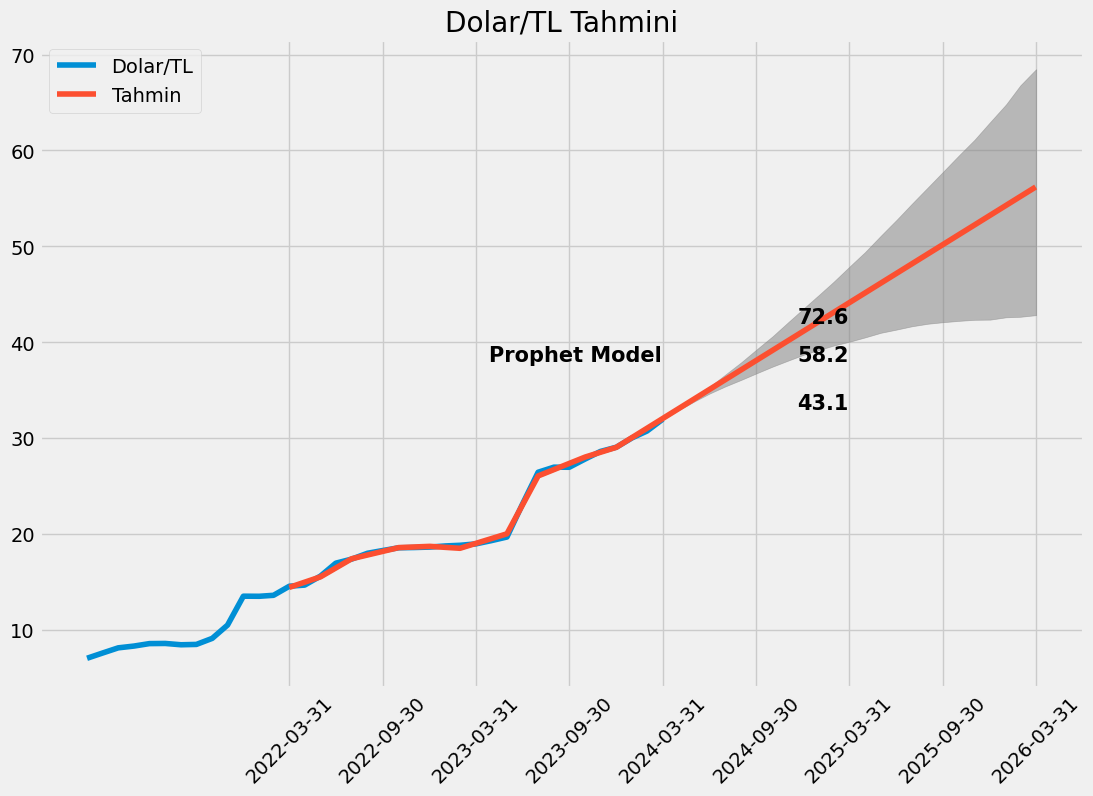

In [64]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(df6["USD/TL"][-38:],label='Dolar/TL')
plt.plot(predictions["yhat"][-51:-2],label='Tahmin')
annotation_date = mdates.datestr2num('2025-03-30')
annotation_date1 = mdates.datestr2num('2024-03-30')
plt.text(annotation_date1, 38,  "Prophet Model",fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 38,  str(predictions["yhat"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 33,  str(predictions["yhat_lower"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 42,  str(predictions["yhat_upper"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.fill_between(predictions["yhat"][-51:-1].index.strftime("%Y-%m"), predictions["yhat_upper"][-51:-1].shift(1), predictions["yhat_lower"][-51:-1].shift(1), alpha=0.5, color='gray')
plt.xticks(predictions.index[-51:-2:6],rotation=45)
plt.title('Dolar/TL Tahmini')
plt.legend(loc=2)

In [70]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-04-30    3.091041
2024-05-31    3.098306
2024-06-30    2.908254
2024-07-31    2.920267
2024-08-31    2.837407
2024-09-30    2.670116
2024-10-31    2.687364
2024-11-30    2.532614
2024-12-31    2.552392
2025-01-31    2.488867
2025-02-28    2.193417
2025-03-31    2.376304
2025-04-30    2.246271
2025-05-31    2.270153
2025-06-30    2.148156
2025-07-31    2.173080
2025-08-31    2.126861
2025-09-30    2.015388
2025-10-31    2.041425
2025-11-30    1.936050
2025-12-31    1.962588
2026-01-31    1.924812
2026-02-28    1.705708
2026-03-31    1.856791
2026-04-30    1.764138
2026-05-31    1.791341
Name: yhat, dtype: float64

In [71]:
usdtahmin1 = []
result = df6.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([df6.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-10-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-10-31,27.846114
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,32.000000
2024-04-30,32.989133
2024-05-31,34.011237
2024-06-30,35.000370
2024-07-31,36.022474


In [134]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [135]:
"""study.best_params"""

'study.best_params'

In [72]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:20:14 - cmdstanpy - INFO - Chain [1] start processing
19:20:14 - cmdstanpy - INFO - Chain [1] done processing


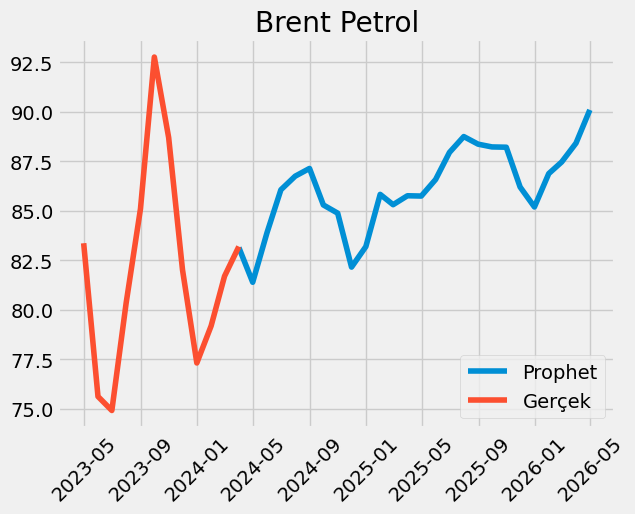

In [73]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [76]:
brenttahmin=predictions["yhat"][-28:]
brenttahmin

ds
2024-01-31    78.931936
2024-02-29    83.193128
2024-03-31    83.151235
2024-04-30    81.398228
2024-05-31    83.903423
2024-06-30    86.065949
2024-07-31    86.752698
2024-08-31    87.143199
2024-09-30    85.300097
2024-10-31    84.886016
2024-11-30    82.162463
2024-12-31    83.199720
2025-01-31    85.833513
2025-02-28    85.313730
2025-03-31    85.764238
2025-04-30    85.749670
2025-05-31    86.584424
2025-06-30    87.951237
2025-07-31    88.752335
2025-08-31    88.369204
2025-09-30    88.229382
2025-10-31    88.214292
2025-11-30    86.205237
2025-12-31    85.198609
2026-01-31    86.882566
2026-02-28    87.468917
2026-03-31    88.418652
2026-04-30    90.099364
Name: yhat, dtype: float64

In [81]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
sn["USD"]=df6.values[88:]

In [140]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    sn["USD"]=(df6.pct_change()*100)[88:-1].dropna().values
    prophet=Prophet(**params)
    prophet.add_regressor('USD')
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    sn["USD"]=(df6.pct_change()*100)[88:-1].dropna().values\n    prophet=Prophet(**params)\n    prophet.add_regressor(\'USD\')\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    future_dates["USD"]=pd.concat([sn["USD"],usdtahmin.head(13)],axis=0).values\n    predictions=prophet.predict(fut

In [141]:
"""study.best_params"""

'study.best_params'

19:22:07 - cmdstanpy - INFO - Chain [1] start processing
19:22:08 - cmdstanpy - INFO - Chain [1] done processing


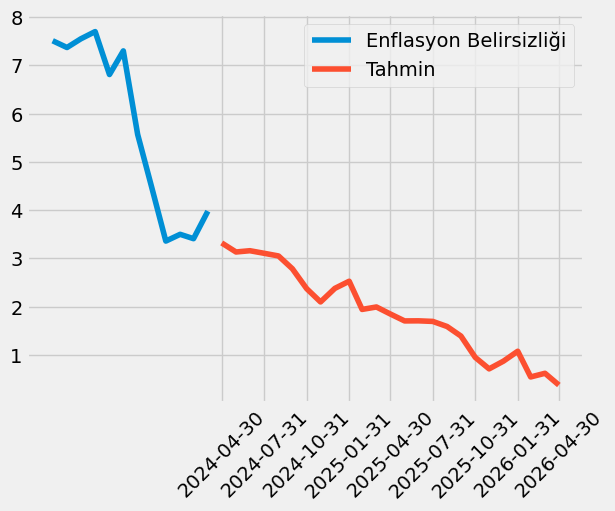

In [93]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=3.2891424441378785,changepoint_range=0.9994901336677199,seasonality_prior_scale=0.1653403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()


In [95]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-03-31,3.980000
2024-04-30,3.321453
2024-05-31,3.134249
2024-06-30,3.160474
2024-07-31,3.107067
2024-08-31,3.052094
2024-09-30,2.786711
2024-10-31,2.374110
2024-11-30,2.099454


In [144]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [145]:
#study.best_params

In [96]:
sn=pd.DataFrame()
sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].index
sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].values
sn["cap"]=190
prophet=Prophet(changepoint_prior_scale=3.481321992729419,changepoint_range=0.8995930316928846,growth='linear',seasonality_prior_scale=8.977376335194005,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
future_dates["cap"]=190
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:22:31 - cmdstanpy - INFO - Chain [1] start processing
19:22:32 - cmdstanpy - INFO - Chain [1] done processing


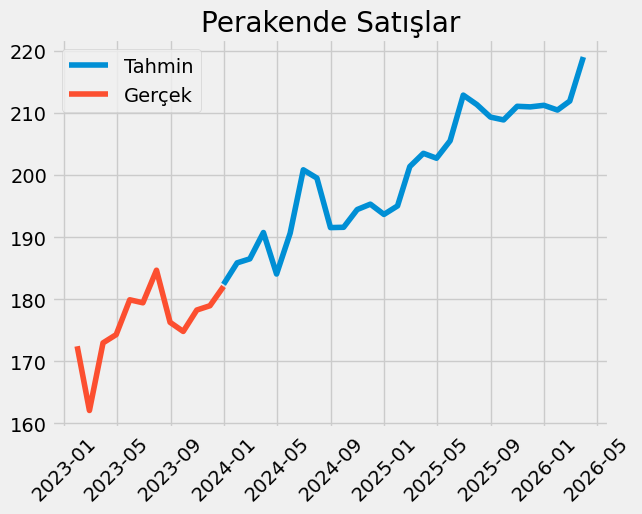

In [147]:
plt.title("Perakende Satışlar")
plt.plot(predictions["yhat"][-28:],label="Tahmin")
plt.plot(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [97]:
perakendetahmin=(predictions["yhat"][-28:].pct_change(periods=1)*100).dropna()
perakendetahmin

ds
2024-01-31    1.899453
2024-02-29    0.347187
2024-03-31    2.275449
2024-04-30   -3.506735
2024-05-31    3.578296
2024-06-30    5.356224
2024-07-31   -0.663651
2024-08-31   -3.999949
2024-09-30    0.025459
2024-10-31    1.493126
2024-11-30    0.446150
2024-12-31   -0.845813
2025-01-31    0.708612
2025-02-28    3.251780
2025-03-31    1.059153
2025-04-30   -0.388384
2025-05-31    1.389245
2025-06-30    3.578033
2025-07-31   -0.716229
2025-08-31   -0.953721
2025-09-30   -0.217622
2025-10-31    1.049791
2025-11-30   -0.043539
2025-12-31    0.119629
2026-01-31   -0.361156
2026-02-28    0.688540
2026-03-31    3.348129
Name: yhat, dtype: float64

In [100]:
((usdtahmin1[3:-2].pct_change(periods=1)*100).dropna())

,USD/TL
2024-02-29,2.348118
2024-03-31,4.033078
2024-04-30,3.091041
2024-05-31,3.098306
2024-06-30,2.908254
2024-07-31,2.920267
2024-08-31,2.837407
2024-09-30,2.670116
2024-10-31,2.687364
2024-11-30,2.532614


In [101]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-02-29    5.398565
2024-03-31   -0.050356
2024-04-30   -2.108216
2024-05-31    3.077702
2024-06-30    2.577399
2024-07-31    0.797933
2024-08-31    0.450131
2024-09-30   -2.115026
2024-10-31   -0.485440
2024-11-30   -3.208483
2024-12-31    1.262447
2025-01-31    3.165627
2025-02-28   -0.605571
2025-03-31    0.528060
2025-04-30   -0.016986
2025-05-31    0.973478
2025-06-30    1.578589
2025-07-31    0.910843
2025-08-31   -0.431685
2025-09-30   -0.158225
2025-10-31   -0.017104
2025-11-30   -2.277471
2025-12-31   -1.167710
2026-01-31    1.976507
2026-02-28    0.674878
2026-03-31    1.085796
2026-04-30    1.900858
Name: yhat, dtype: float64

In [105]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[3:-2].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-1]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-02-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-02-29,7.807351
2024-03-31,3.980691
2024-04-30,0.917659
2024-05-31,6.271365
2024-06-30,5.560610
2024-07-31,3.741502
2024-08-31,3.300310
2024-09-30,0.498615
2024-10-31,2.188878
2024-11-30,-0.757127


In [153]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [154]:
"""study.best_params"""

'study.best_params'

In [106]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=1.916034897796889,changepoint_range=0.9729543315216538,growth='linear',seasonality_prior_scale=4.453031163229546,n_changepoints=89,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:24:32 - cmdstanpy - INFO - Chain [1] start processing
19:24:32 - cmdstanpy - INFO - Chain [1] done processing


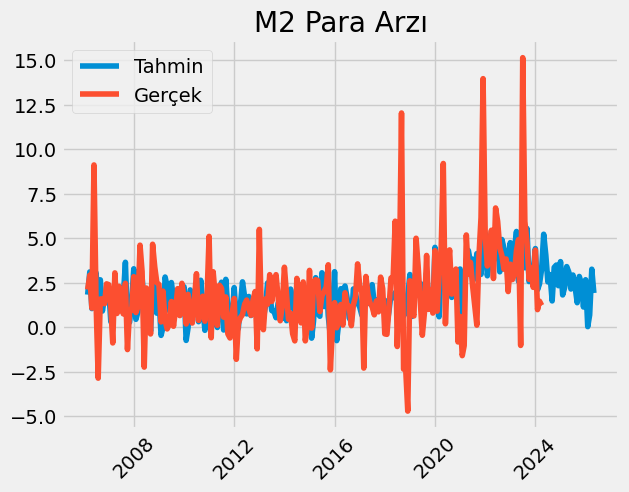

In [107]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [108]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-04-30    5.228708
2024-05-31    4.055621
2024-06-30    2.549198
2024-07-31    2.963459
2024-08-31    1.484086
2024-09-30    3.364671
2024-10-31    3.499645
2024-11-30    2.338917
2024-12-31    3.690579
2025-01-31    1.818121
2025-02-28    2.221985
2025-03-31    3.412214
2025-04-30    3.112394
2025-05-31    2.151344
2025-06-30    2.938184
2025-07-31    2.258347
2025-08-31    1.382455
2025-09-30    2.857806
2025-10-31    2.461131
2025-11-30    1.141915
2025-12-31    2.672944
2026-01-31    0.037885
2026-02-28    0.693812
2026-03-31    3.264594
2026-04-30    1.927490
Name: yhat, dtype: float64

In [109]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-04-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2023-12-30",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2023-12-31,4.333376
2024-01-31,0.993354
2024-02-29,1.467899
2024-03-31,1.231314
2024-04-30,5.228708
2024-05-31,4.055621
2024-06-30,2.549198
2024-07-31,2.963459
2024-08-31,1.484086
2024-09-30,3.364671


In [159]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [160]:
#study.best_params

In [110]:
sn=pd.DataFrame()
sn["ds"]=borc["Borç"][103:].index
sn["y"]=borc["Borç"][103:].values
sn["cap"]=100
prophet=Prophet(changepoint_prior_scale=3.671534257218686,changepoint_range=0.8995013103592469,growth='linear',seasonality_prior_scale=4.464356522636207,n_changepoints=2)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
future_dates["cap"]=100
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:24:46 - cmdstanpy - INFO - Chain [1] start processing
19:24:46 - cmdstanpy - INFO - Chain [1] done processing


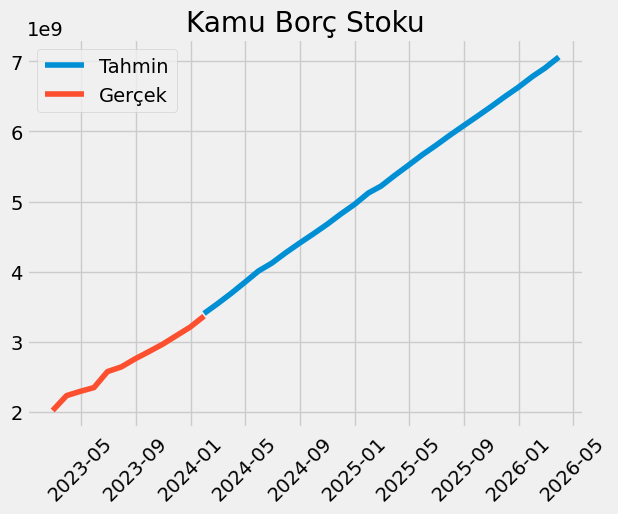

In [162]:
plt.title("Kamu Borç Stoku")
plt.plot(predictions["yhat"][-27:],label="Tahmin")
plt.plot(borc["Borç"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [111]:
borctahmin=(predictions["yhat"].pct_change(periods=1)*100).tail(26)
borctahmin

ds
2024-02-29    3.931115
2024-03-31    4.257236
2024-04-30    4.213795
2024-05-31    4.275757
2024-06-30    2.843438
2024-07-31    3.593886
2024-08-31    3.232160
2024-09-30    2.921967
2024-10-31    3.036143
2024-11-30    3.089515
2024-12-31    2.899262
2025-01-31    3.283513
2025-02-28    1.914112
2025-03-31    2.957358
2025-04-30    2.646211
2025-05-31    2.720277
2025-06-30    2.347082
2025-07-31    2.488168
2025-08-31    2.317654
2025-09-30    2.172175
2025-10-31    2.228737
2025-11-30    2.207552
2025-12-31    2.114284
2026-01-31    2.294370
2026-02-28    1.777334
2026-03-31    2.284275
Name: yhat, dtype: float64

In [112]:
borctahmin1 = []
result = borc.iloc[-1,0]
for i in range(len(borctahmin)):
    result *= (1 + borctahmin[i] / 100)
    borctahmin1.append(result)

borctahmin1 = np.array(borctahmin1).reshape(-1, 1)
borctahmin1 = pd.DataFrame(borctahmin1)
borctahmin1.columns = ["Borç"]
borctahmin1 = borctahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(borctahmin1), freq="1M"))
row=pd.DataFrame({"Borç":borc.iloc[-4:,0]},index=pd.date_range(start="2023-10-30",periods=4,freq="1M"))
borctahmin1=pd.concat([row,borctahmin1],axis=0)
borctahmin1

,Borç
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09
2024-01-31,3.366451e+09
2024-02-29,3.498790e+09
2024-03-31,3.647741e+09
2024-04-30,3.801450e+09
2024-05-31,3.963991e+09
2024-06-30,4.076704e+09
2024-07-31,4.223216e+09


In [165]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [166]:
"""study.best_params"""

'study.best_params'

In [115]:
sn=pd.DataFrame()
sn["ds"]=df3["Kredi"].index
sn["y"]=df3["Kredi"].values
prophet=Prophet(changepoint_prior_scale=30.99759561372614,changepoint_range=0.872589785485153,growth="linear",seasonality_prior_scale=3.534157847860739,n_changepoints=189,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:25:17 - cmdstanpy - INFO - Chain [1] start processing
19:25:18 - cmdstanpy - INFO - Chain [1] done processing


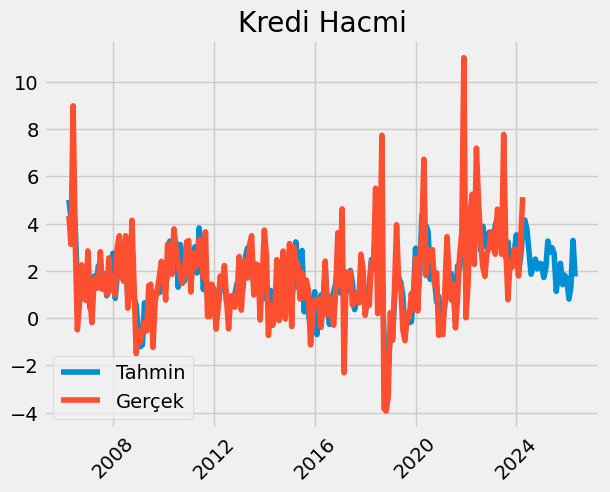

In [116]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(df3["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [117]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-04-30    4.162997
2024-05-31    3.785550
2024-06-30    2.834364
2024-07-31    1.860872
2024-08-31    2.193939
2024-09-30    2.505531
2024-10-31    2.089794
2024-11-30    2.317718
2024-12-31    2.293849
2025-01-31    1.721159
2025-02-28    2.078881
2025-03-31    3.265809
2025-04-30    2.793109
2025-05-31    2.981977
2025-06-30    2.745925
2025-07-31    1.137224
2025-08-31    1.900055
2025-09-30    2.322949
2025-10-31    1.420608
2025-11-30    1.825444
2025-12-31    1.661098
2026-01-31    0.808619
2026-02-28    1.326292
2026-03-31    3.290786
2026-04-30    1.765474
Name: yhat, dtype: float64

In [118]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-04-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":df3.iloc[-4:,0]},index=pd.date_range(start="2023-12-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2023-12-31,2.873464
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,5.122580
2024-04-30,4.162997
2024-05-31,3.785550
2024-06-30,2.834364
2024-07-31,1.860872
2024-08-31,2.193939
2024-09-30,2.505531


In [171]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3 Para Arzi"].index
    sn["y"]=m3["M3 Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3 Para Arzi"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3 Para Arzi"].index\n    sn["y"]=m3["M3 Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_ran

In [172]:
"""study.best_params"""

'study.best_params'

In [119]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=6.802652830514151,changepoint_range=0.9787110716126334,growth='linear',seasonality_prior_scale=5.79604715670266,n_changepoints=98,yearly_seasonality="auto",weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:25:28 - cmdstanpy - INFO - Chain [1] start processing
19:25:28 - cmdstanpy - INFO - Chain [1] done processing


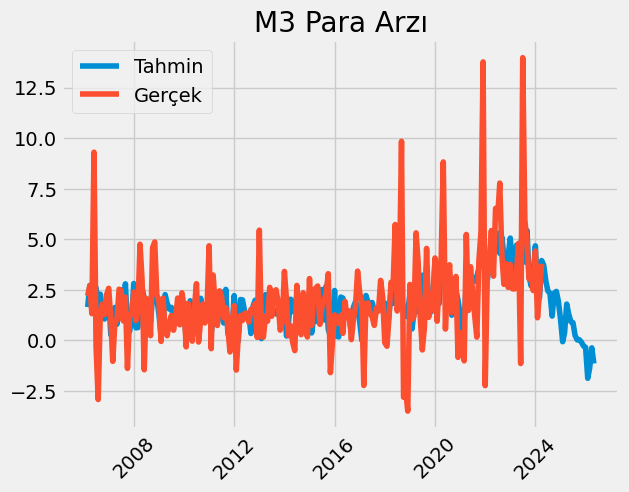

In [120]:
plt.title("M3 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(m3["M3"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [121]:
(predictions["yhat"].tail(26))

ds
2024-03-31    3.948559
2024-04-30    3.723192
2024-05-31    2.934590
2024-06-30    2.448574
2024-07-31    2.318324
2024-08-31    1.203483
2024-09-30    2.334822
2024-10-31    2.422609
2024-11-30    1.933047
2024-12-31    1.051762
2025-01-31   -0.063620
2025-02-28    0.381166
2025-03-31    1.796559
2025-04-30    1.288792
2025-05-31    0.924676
2025-06-30    0.878440
2025-07-31    0.244516
2025-08-31    0.027154
2025-09-30    0.035043
2025-10-31   -0.084612
2025-11-30   -0.273082
2025-12-31   -0.345994
2026-01-31   -1.873987
2026-02-28   -1.362723
2026-03-31   -0.367753
2026-04-30   -1.142047
Name: yhat, dtype: float64

In [122]:
m3tahmin=(predictions["yhat"].tail(26))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-04-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2023-12-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2023-12-31,4.417846
2024-01-31,1.120968
2024-02-29,2.360273
2024-03-31,3.789721
2024-04-30,3.948559
2024-05-31,3.723192
2024-06-30,2.934590
2024-07-31,2.448574
2024-08-31,2.318324
2024-09-30,1.203483


In [177]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [178]:
#study.best_params

In [124]:
sn=pd.DataFrame()
sn["ds"]=sanayi["Sanayi"].index
sn["y"]=sanayi["Sanayi"].values
prophet=Prophet(changepoint_prior_scale=9.619978429571834,changepoint_range=0.8872026398316396,growth='linear',seasonality_prior_scale=4.66384076344283,n_changepoints=25,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:25:45 - cmdstanpy - INFO - Chain [1] start processing
19:25:45 - cmdstanpy - INFO - Chain [1] done processing


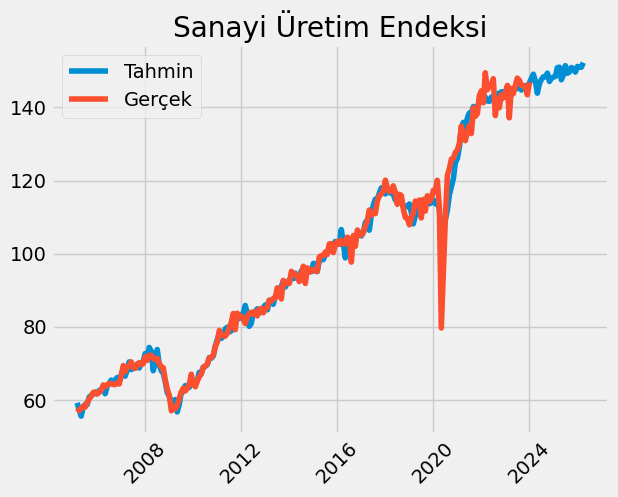

In [180]:
plt.title("Sanayi Üretim Endeksi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(sanayi["Sanayi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [125]:
sanayitahmin=(predictions["yhat"].tail(28).pct_change(periods=1)*100).dropna()
sanayitahmin1 = []
result = sanayi.iloc[-1,0]
for i in range(len(sanayitahmin)):
    result *= (1 + sanayitahmin[i] / 100)
    sanayitahmin1.append(result)

sanayitahmin1 = np.array(sanayitahmin1).reshape(-1, 1)
sanayitahmin1 = pd.DataFrame(sanayitahmin1)
sanayitahmin1.columns = ["Sanayi"]
sanayitahmin1 = sanayitahmin1.set_index(pd.date_range(start="2024-01-31", periods=len(sanayitahmin1), freq="1M"))
#row=pd.DataFrame({"Sanayi":df3.iloc[-2:,0]},index=pd.date_range(start="2023-10-30",periods=2,freq="1M"))
#sanayitahmin1=pd.concat([row,sanayitahmin1],axis=0)
sanayitahmin1

,Sanayi
2024-01-31,148.172656
2024-02-29,149.304582
2024-03-31,147.440413
2024-04-30,144.090834
2024-05-31,146.699778
2024-06-30,147.812608
2024-07-31,148.585767
2024-08-31,148.601460
2024-09-30,149.580131
2024-10-31,147.325270


In [126]:
redkt=redkt.pct_change()*100
redk=redk.pct_change()*100
redkt=redkt.dropna()
redk=redk.dropna()

In [183]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [184]:
#study.best_params

In [127]:
sn=pd.DataFrame()
sn["ds"]=redkt["REDKT"].index
sn["y"]=redkt["REDKT"].values
prophet=Prophet(changepoint_prior_scale=9.989231798653107,
 changepoint_range=0.960887868185737,
 growth='linear',seasonality_prior_scale=2.612910619508741,n_changepoints=50,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:25:50 - cmdstanpy - INFO - Chain [1] start processing
19:25:50 - cmdstanpy - INFO - Chain [1] done processing


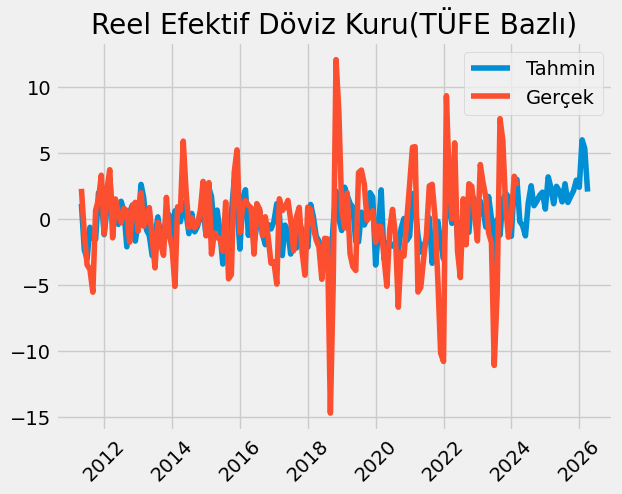

In [128]:
plt.title("Reel Efektif Döviz Kuru(TÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redkt["REDKT"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [129]:
predictions["yhat"].tail(25)

ds
2024-03-31   -0.183185
2024-04-30   -0.490423
2024-05-31   -1.274889
2024-06-30    1.216762
2024-07-31    2.514928
2024-08-31    1.007623
2024-09-30    1.344627
2024-10-31    1.787637
2024-11-30    2.030190
2024-12-31    0.752782
2025-01-31    3.187195
2025-02-28    2.388477
2025-03-31    1.157281
2025-04-30    2.470775
2025-05-31    2.108754
2025-06-30    1.299714
2025-07-31    2.667394
2025-08-31    1.255629
2025-09-30    1.709729
2025-10-31    2.147297
2025-11-30    2.939350
2025-12-31    2.401928
2026-01-31    5.989681
2026-02-28    5.337517
2026-03-31    2.073117
Name: yhat, dtype: float64

In [130]:
redkttahmin=pd.DataFrame(predictions["yhat"].tail(25),index=predictions.index[-25:])
redkttahmin.columns=["REDKT"]
redkttahmin.index.name=""
redkttahmin

,REDKT
,
2024-03-31,-0.183185
2024-04-30,-0.490423
2024-05-31,-1.274889
2024-06-30,1.216762
2024-07-31,2.514928
2024-08-31,1.007623
2024-09-30,1.344627
2024-10-31,1.787637
2024-11-30,2.030190


In [189]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redk["REDK"].index
    sn["y"]=redk["REDK"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=26,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"].iloc[:-26])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redk["REDK"].index\n    sn["y"]=redk["REDK"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_

In [190]:
#study.best_params

In [131]:
sn=pd.DataFrame()
sn["ds"]=redk["REDK"].index
sn["y"]=redk["REDK"].values
prophet=Prophet(changepoint_prior_scale=9.940418274244966,changepoint_range=0.9610240851805488,growth='linear',seasonality_prior_scale=7.183346343813709,n_changepoints=100,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

19:25:58 - cmdstanpy - INFO - Chain [1] start processing
19:25:58 - cmdstanpy - INFO - Chain [1] done processing


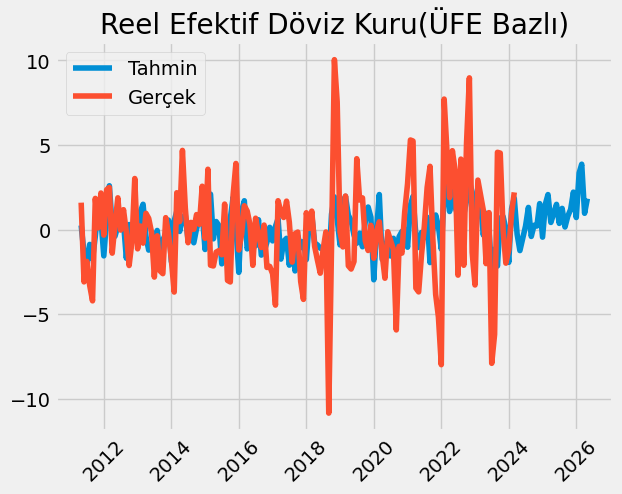

In [192]:
plt.title("Reel Efektif Döviz Kuru(ÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redk["REDK"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [132]:
predictions["yhat"].tail(26)

ds
2024-03-31   -0.276376
2024-04-30   -1.240460
2024-05-31   -0.495024
2024-06-30    0.208132
2024-07-31    1.311894
2024-08-31   -0.404283
2024-09-30    0.253999
2024-10-31    0.211515
2024-11-30    1.538053
2024-12-31   -0.444100
2025-01-31    1.515899
2025-02-28    2.070819
2025-03-31    0.423395
2025-04-30    0.938707
2025-05-31    1.493092
2025-06-30    0.367570
2025-07-31    1.254711
2025-08-31    0.154223
2025-09-30    0.788108
2025-10-31    1.191802
2025-11-30    2.216634
2025-12-31    0.715234
2026-01-31    3.345095
2026-02-28    3.867063
2026-03-31    0.963738
2026-04-30    1.832414
Name: yhat, dtype: float64

In [133]:
redktahmin=predictions["yhat"].tail(26).values
redktahmin = np.array(redktahmin).reshape(-1, 1)
redktahmin = pd.DataFrame(redktahmin)
redktahmin.columns = ["REDK"]
redktahmin = redktahmin.set_index(pd.date_range(start="2024-03-28", periods=len(redktahmin), freq="1M"))
redktahmin

,REDK
2024-03-31,-0.276376
2024-04-30,-1.240460
2024-05-31,-0.495024
2024-06-30,0.208132
2024-07-31,1.311894
2024-08-31,-0.404283
2024-09-30,0.253999
2024-10-31,0.211515
2024-11-30,1.538053
2024-12-31,-0.444100


In [195]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 2),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.001,1.0),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoinst',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=historical_volatility.index
    sn["y"]=historical_volatility.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 2),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.001,1.0),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoinst\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=historical_volatility.index\n    sn["y"]=historical_volatility.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predict

In [196]:
"""study.best_params"""

'study.best_params'

In [138]:
data["M3"]=data["M3"].shift(1)
data.corr()["TÜFE"]

USD/TL                    0.703364
Motorin                   0.702819
Zam                       0.435837
M3                        0.567409
Enflasyon Belirsizliği    0.620059
ParaArzi                  0.669465
Borç                      0.467379
Kredi                     0.564169
Mevduat Faizi             0.442844
REDK                      0.005822
REDKT                     0.001902
İşsizlik                 -0.237975
Politika Faizi            0.301142
Beklenti                  0.806968
TÜFE                      1.000000
M31                       0.567409
Name: TÜFE, dtype: float64

In [277]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean(),sanayitahmin1["Sanayi"],borctahmin1.shift(1)],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Kredi Faizi"]=kfaiztahmin["Kredi Faizi"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["REDKT"]=redkttahmin["REDKT"]
tahmindf["REDK"]=redktahmin["REDK"]
#tahmindf["Politika Faizi"]=faiztahmin["Faiz"]
tahmindf["Perakende Satış"]=perakendetahmin




tahmindf["Politika Faizi"]=[42.5,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,32.5,30,40,40,40]
tahmindf=tahmindf[['USD/TL', 'Motorin', 'Kredi Faizi', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3','Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]]

tahmindf.columns=["USD/TL","Motorin","Kredi Faizi","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]
tahmindf=tahmindf.dropna(axis=0)












tahmindf["Beklenti"]=3.80
tahmindf["Beklenti"].iloc[1:]=0
tahmindf=tahmindf.iloc[:14]
tahmindf.iloc[0,1]=-2.90
tahmindf

,USD/TL,Motorin,Kredi Faizi,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi,Sanayi,Perakende Satış,Beklenti
2024-03-31,3.254206,-2.900000,61.660000,0.0,3.980000,1.467899,2.360273,3.931115,3.347388,53.630000,-0.183185,-0.276376,9.172799,45.0,-1.248568,2.275449,3.8
2024-04-30,3.162679,0.917659,62.808862,0.0,3.321453,1.231314,3.789721,4.257236,4.138613,50.985886,-0.490423,-1.240460,9.223137,45.0,-2.271819,-3.506735,0.0
2024-05-31,3.396175,6.271365,63.863664,0.0,3.134249,5.228708,3.948559,4.213795,4.357042,51.425699,-1.274889,-0.495024,9.247148,45.0,1.810625,3.578296,0.0
2024-06-30,3.030666,5.560610,64.250988,0.0,3.160474,4.055621,3.723192,4.275757,3.594304,52.374222,1.216762,0.208132,9.241430,45.0,0.758577,5.356224,0.0
2024-07-31,2.973843,3.741502,63.933625,0.0,3.107067,2.549198,2.934590,2.843438,2.826928,50.928813,2.514928,1.311894,9.253224,45.0,0.523067,-0.663651,0.0
2024-08-31,2.887959,3.300310,63.284855,0.0,3.052094,2.963459,2.448574,3.593886,2.296392,51.535298,1.007623,-0.404283,9.259024,45.0,0.010562,-3.999949,0.0
2024-09-30,2.806897,0.498615,62.763977,0.0,2.786711,1.484086,2.318324,3.232160,2.186781,51.978803,1.344627,0.253999,9.257643,45.0,0.658587,0.025459,0.0
2024-10-31,2.730262,2.188878,62.631849,0.0,2.374110,3.364671,1.203483,2.921967,2.263088,51.194611,1.787637,0.211515,9.260492,45.0,-1.507460,1.493126,0.0
2024-11-30,2.628811,-0.757127,62.857054,0.0,2.099454,3.499645,2.334822,3.036143,2.304348,51.571037,2.030190,1.538053,9.261893,45.0,0.610730,0.446150,0.0
2024-12-31,2.589623,3.847062,63.213797,0.0,2.380430,2.338917,2.422609,3.089515,2.233787,51.771054,0.752782,-0.444100,9.261559,45.0,0.192091,-0.845813,0.0


In [278]:
tahmindf=tahmindf.drop(["Sanayi","Perakende Satış","Kredi Faizi"],axis=1)

In [287]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,Zam,M3,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,Beklenti,TÜFE
2014-01-31,3.732429,2.881984,10.828025,1.958423,0.820000,3.375162,-0.584687,2.669930,8.850000,-3.691204,-5.094658,9.200000,9.96,1.06,1.978080
2014-02-28,3.033477,1.685899,0.000000,0.229599,0.730000,1.804994,0.808574,1.876850,10.750000,2.179150,0.919060,9.500000,10.23,0.69,0.428192
2014-03-31,2.465778,-2.278097,0.000000,0.730196,0.800000,0.451349,0.193691,0.822203,11.650000,0.471546,0.641623,9.500000,10.27,0.65,1.125608
2014-04-30,-1.344724,-6.214384,0.000000,-0.093468,0.730000,0.796760,0.478162,-0.154556,10.750000,4.682667,5.892031,9.700000,10.03,0.76,1.344970
2014-05-31,-1.859714,-0.561578,0.000000,-0.505049,0.800000,-0.362357,0.091080,0.146305,10.430000,1.283880,2.058652,9.700000,9.53,0.63,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,2.589623,6.016705,0.000000,1.933047,2.163112,2.338917,3.089515,2.233787,51.648433,-0.444100,0.752782,9.261559,45.00,0.00,NaN
2025-01-31,2.524254,0.000000,30.000000,1.051762,2.157937,3.690579,2.899262,2.110909,51.237917,1.515899,3.187195,9.262247,45.00,0.00,NaN
2025-02-28,2.408581,0.000000,0.000000,-0.063620,1.790974,1.818121,3.283513,2.031296,51.471425,2.070819,2.388477,9.266150,45.00,0.00,NaN
2025-03-31,2.351932,0.000000,0.000000,0.381166,1.752338,2.221985,1.914112,2.355283,50.345441,0.423395,1.157281,9.269633,45.00,0.00,NaN


In [200]:
features=['USD/TL', 'Motorin','Enflasyon Belirsizliği','M3', 'Kredi','REDK','Politika Faizi','TÜFE']
data1=data1[features]

In [201]:
data1.loc["2023-05-31","TÜFE"]+=2.88
"""data1.loc["2023-10-31","TÜFE"]-=0.22
data1.loc["2023-11-30","TÜFE"]-=1.01
data1.loc["2023-12-31","TÜFE"]-=0.33"""

'data1.loc["2023-10-31","TÜFE"]-=0.22\ndata1.loc["2023-11-30","TÜFE"]-=1.01\ndata1.loc["2023-12-31","TÜFE"]-=0.33'

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Enflasyon Belirsizliği,M3,Kredi,REDK,Politika Faizi,TÜFE
0,0.433912,0.103365,-0.622741,-0.127041,0.554876,-1.223894,-0.631491,0.047268
1,0.216370,-0.064571,-0.656817,-0.812187,0.023470,0.700815,-0.608536,-0.634592
2,0.039679,-0.621136,-0.630313,-0.613797,-0.683200,0.140944,-0.605135,-0.327770
3,-1.146304,-1.173811,-0.656817,-0.940221,-1.337680,1.521642,-0.625539,-0.231263
4,-1.306590,-0.380128,-0.630313,-1.103334,-1.136087,0.407284,-0.668049,-0.649096
...,...,...,...,...,...,...,...,...
131,0.078224,0.543496,-0.114210,-0.137098,0.262637,-0.159268,2.347573,NaN
132,0.057879,-0.301280,-0.116169,-0.486357,0.180302,0.483356,2.347573,NaN
133,0.021877,-0.301280,-0.255109,-0.928392,0.126957,0.665297,2.347573,NaN
134,0.004245,-0.301280,-0.269738,-0.752120,0.344046,0.125157,2.347573,NaN


In [203]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)


In [204]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-4)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 40)
    activation1 = trial.suggest_categorical('activation1', ['tanh'])
    optimizer = trial.suggest_categorical('optimizer', ['rmsprop'])
    rlrate=trial.suggest_float('rlrate',0.01,0.5)
    drate=trial.suggest_float('drate',0.1,0.5)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective


ModuleNotFoundError: No module named 'optuna'

In [ ]:
"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=200)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

[I 2024-03-08 20:10:07,122] A new study created in memory with name: no-name-a7a3a284-bf0b-4a26-b81b-c62b22ed3c2b


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:10:42,944] Trial 0 finished with value: 2.7539989047279256 and parameters: {'learning_rate': 0.0001, 'units1': 24, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.2612521882524063, 'drate': 0.45258488659844176}. Best is trial 0 with value: 2.7539989047279256.


1/1 [==============================] - 0s 80ms/step


[I 2024-03-08 20:11:05,204] Trial 1 finished with value: 4.47639038044306 and parameters: {'learning_rate': 0.0001, 'units1': 9, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.31748926409716016, 'drate': 0.16033417750513446}. Best is trial 0 with value: 2.7539989047279256.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:11:21,413] Trial 2 finished with value: 3.2500110693556974 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.3367764013807836, 'drate': 0.43967607940827436}. Best is trial 0 with value: 2.7539989047279256.


1/1 [==============================] - 0s 77ms/step


[I 2024-03-08 20:11:57,124] Trial 3 finished with value: 2.6507487928896025 and parameters: {'learning_rate': 0.0001, 'units1': 13, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.21144524189407946, 'drate': 0.19017850812136025}. Best is trial 3 with value: 2.6507487928896025.


1/1 [==============================] - 0s 75ms/step


[I 2024-03-08 20:12:31,255] Trial 4 finished with value: 3.0101317245491015 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.35985462067913826, 'drate': 0.44075817659784666}. Best is trial 3 with value: 2.6507487928896025.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:12:50,224] Trial 5 finished with value: 8.238557683228093 and parameters: {'learning_rate': 0.0001, 'units1': 5, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.47917266409733683, 'drate': 0.24916470029227}. Best is trial 3 with value: 2.6507487928896025.


1/1 [==============================] - 0s 68ms/step


[I 2024-03-08 20:13:05,115] Trial 6 finished with value: 2.9425041158594625 and parameters: {'learning_rate': 0.0001, 'units1': 64, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.2683164762522014, 'drate': 0.37038144347687285}. Best is trial 3 with value: 2.6507487928896025.


1/1 [==============================] - 0s 80ms/step


[I 2024-03-08 20:13:23,049] Trial 7 finished with value: 2.5230717692755076 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.18659327180759275, 'drate': 0.4979400469559152}. Best is trial 7 with value: 2.5230717692755076.


1/1 [==============================] - 0s 61ms/step


[I 2024-03-08 20:13:36,565] Trial 8 finished with value: 2.0790120608904608 and parameters: {'learning_rate': 0.0001, 'units1': 95, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06998682550194522, 'drate': 0.15093093476632521}. Best is trial 8 with value: 2.0790120608904608.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:13:46,356] Trial 9 finished with value: 2.518390625106491 and parameters: {'learning_rate': 0.0001, 'units1': 81, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.18521428203308807, 'drate': 0.4285415461816916}. Best is trial 8 with value: 2.0790120608904608.


1/1 [==============================] - 0s 96ms/step


[I 2024-03-08 20:13:48,271] Trial 10 finished with value: 3.5467271856653793 and parameters: {'learning_rate': 0.0001, 'units1': 127, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02772418612775604, 'drate': 0.1290295877960308}. Best is trial 8 with value: 2.0790120608904608.


1/1 [==============================] - 0s 69ms/step


[I 2024-03-08 20:14:05,469] Trial 11 finished with value: 2.067604583861597 and parameters: {'learning_rate': 0.0001, 'units1': 98, 'batch_size': 28, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0759463870764483, 'drate': 0.31701160550084184}. Best is trial 11 with value: 2.067604583861597.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:14:18,916] Trial 12 finished with value: 1.9666370367079296 and parameters: {'learning_rate': 0.0001, 'units1': 98, 'batch_size': 28, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.030735075910010824, 'drate': 0.30011846905313255}. Best is trial 12 with value: 1.9666370367079296.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:14:36,194] Trial 13 finished with value: 2.034810246870382 and parameters: {'learning_rate': 0.0001, 'units1': 110, 'batch_size': 29, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.09958445936014179, 'drate': 0.31314158789453556}. Best is trial 12 with value: 1.9666370367079296.


1/1 [==============================] - 0s 70ms/step


[I 2024-03-08 20:14:54,717] Trial 14 finished with value: 2.198086269681365 and parameters: {'learning_rate': 0.0001, 'units1': 123, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.11657890227481868, 'drate': 0.2836084175692998}. Best is trial 12 with value: 1.9666370367079296.


1/1 [==============================] - 0s 75ms/step


[I 2024-03-08 20:14:56,109] Trial 15 finished with value: 5.899547050959495 and parameters: {'learning_rate': 0.0001, 'units1': 107, 'batch_size': 31, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.019682965635470562, 'drate': 0.35145263849214614}. Best is trial 12 with value: 1.9666370367079296.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:15:18,191] Trial 16 finished with value: 2.060878538966704 and parameters: {'learning_rate': 0.0001, 'units1': 76, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.11745680232773503, 'drate': 0.23975907794355336}. Best is trial 12 with value: 1.9666370367079296.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:15:31,024] Trial 17 finished with value: 2.258843167459115 and parameters: {'learning_rate': 0.0001, 'units1': 110, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.13803208791306734, 'drate': 0.37675950867291075}. Best is trial 12 with value: 1.9666370367079296.


1/1 [==============================] - 0s 69ms/step


[I 2024-03-08 20:15:32,425] Trial 18 finished with value: 7.268331278269662 and parameters: {'learning_rate': 0.0001, 'units1': 90, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.012799981701386548, 'drate': 0.3045627989968747}. Best is trial 12 with value: 1.9666370367079296.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:15:54,047] Trial 19 finished with value: 1.8490354758930112 and parameters: {'learning_rate': 0.0001, 'units1': 112, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.07131549122890968, 'drate': 0.20531966719350295}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 85ms/step


[I 2024-03-08 20:16:08,535] Trial 20 finished with value: 1.9475160194142944 and parameters: {'learning_rate': 0.0001, 'units1': 75, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05895598755424466, 'drate': 0.20844379534765967}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 81ms/step


[I 2024-03-08 20:16:10,906] Trial 21 finished with value: 5.630143915586641 and parameters: {'learning_rate': 0.0001, 'units1': 73, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.046099115527267975, 'drate': 0.21264606243516668}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 91ms/step


[I 2024-03-08 20:16:29,368] Trial 22 finished with value: 2.2285051120020647 and parameters: {'learning_rate': 0.0001, 'units1': 88, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.14497855659444786, 'drate': 0.10610009068476818}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:16:42,464] Trial 23 finished with value: 2.08614341103909 and parameters: {'learning_rate': 0.0001, 'units1': 117, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0672472801236371, 'drate': 0.25967135082493925}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:17:05,069] Trial 24 finished with value: 2.9250075462534455 and parameters: {'learning_rate': 0.0001, 'units1': 103, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.4088304241585426, 'drate': 0.1988319982741798}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 89ms/step


[I 2024-03-08 20:17:31,323] Trial 25 finished with value: 2.1686749924263165 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.15294024130959205, 'drate': 0.21922085067062255}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:17:51,119] Trial 26 finished with value: 1.953824887090149 and parameters: {'learning_rate': 0.0001, 'units1': 83, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0875153856283448, 'drate': 0.2729454447318409}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:18:11,351] Trial 27 finished with value: 1.9529523045792985 and parameters: {'learning_rate': 0.0001, 'units1': 69, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.08943552022423096, 'drate': 0.17289816659558385}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 70ms/step


[I 2024-03-08 20:18:32,684] Trial 28 finished with value: 2.5529693749771503 and parameters: {'learning_rate': 0.0001, 'units1': 34, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.19793178415378362, 'drate': 0.16868590873423311}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 68ms/step


[I 2024-03-08 20:18:53,963] Trial 29 finished with value: 2.4637027000489167 and parameters: {'learning_rate': 0.0001, 'units1': 69, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.24857623623352396, 'drate': 0.12772094209685103}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:19:20,777] Trial 30 finished with value: 2.7250441938881114 and parameters: {'learning_rate': 0.0001, 'units1': 24, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.24095254325834145, 'drate': 0.18185240683732748}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 68ms/step


[I 2024-03-08 20:19:39,752] Trial 31 finished with value: 1.9528663369520778 and parameters: {'learning_rate': 0.0001, 'units1': 82, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.08131395556887203, 'drate': 0.23037501028147803}. Best is trial 19 with value: 1.8490354758930112.


1/1 [==============================] - 0s 74ms/step


[I 2024-03-08 20:19:52,838] Trial 32 finished with value: 1.7233061457189276 and parameters: {'learning_rate': 0.0001, 'units1': 62, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.059158105625670726, 'drate': 0.22392003070240962}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:20:02,347] Trial 33 finished with value: 2.28208866422575 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.052268004835107254, 'drate': 0.23699386297965605}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:20:16,880] Trial 34 finished with value: 2.6749749938715897 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.16478616132066506, 'drate': 0.21650004969160236}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:20:34,374] Trial 35 finished with value: 2.138185189011647 and parameters: {'learning_rate': 0.0001, 'units1': 61, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.11528183331395143, 'drate': 0.14991818861909567}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:20:48,131] Trial 36 finished with value: 3.0030562993079126 and parameters: {'learning_rate': 0.0001, 'units1': 79, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.2909675692364878, 'drate': 0.20137569106189204}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 86ms/step


[I 2024-03-08 20:21:07,263] Trial 37 finished with value: 2.088843408900912 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 31, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05486061725287961, 'drate': 0.22688259029632116}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:21:21,848] Trial 38 finished with value: 2.8920996595136135 and parameters: {'learning_rate': 0.0001, 'units1': 87, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.2177851029804502, 'drate': 0.2623042341642521}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 86ms/step


[I 2024-03-08 20:21:37,660] Trial 39 finished with value: 3.1642232408619395 and parameters: {'learning_rate': 0.0001, 'units1': 68, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.36685082358769516, 'drate': 0.19155926388835673}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 76ms/step


[I 2024-03-08 20:21:52,330] Trial 40 finished with value: 3.2244145551105454 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.12799307968847223, 'drate': 0.331420284721791}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 88ms/step


[I 2024-03-08 20:22:10,416] Trial 41 finished with value: 2.1050719237527002 and parameters: {'learning_rate': 0.0001, 'units1': 72, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.08945798996746426, 'drate': 0.17382083334830847}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:22:30,632] Trial 42 finished with value: 2.0411964074322686 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.09964850588810029, 'drate': 0.15112795813920565}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:22:47,014] Trial 43 finished with value: 1.8775320751779434 and parameters: {'learning_rate': 0.0001, 'units1': 64, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04031752193980278, 'drate': 0.24717974192711856}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 79ms/step


[I 2024-03-08 20:22:59,916] Trial 44 finished with value: 2.017406088514653 and parameters: {'learning_rate': 0.0001, 'units1': 63, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04434186591616888, 'drate': 0.24398611067874146}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 70ms/step


[I 2024-03-08 20:23:01,677] Trial 45 finished with value: 6.986662976932273 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.011646865993789814, 'drate': 0.2836689075643401}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:23:12,715] Trial 46 finished with value: 1.9795207827712886 and parameters: {'learning_rate': 0.0001, 'units1': 95, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06947655413717599, 'drate': 0.20608095731155832}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 71ms/step


[I 2024-03-08 20:23:26,134] Trial 47 finished with value: 1.923081824224789 and parameters: {'learning_rate': 0.0001, 'units1': 118, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.038735618132433314, 'drate': 0.25628880433518103}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 78ms/step


[I 2024-03-08 20:23:39,274] Trial 48 finished with value: 1.8321715388552835 and parameters: {'learning_rate': 0.0001, 'units1': 121, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03289207963125359, 'drate': 0.26007266076045166}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 90ms/step


[I 2024-03-08 20:23:53,928] Trial 49 finished with value: 2.047099108227278 and parameters: {'learning_rate': 0.0001, 'units1': 117, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.032931817497345875, 'drate': 0.2808826027970922}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:24:05,135] Trial 50 finished with value: 1.8639856047739203 and parameters: {'learning_rate': 0.0001, 'units1': 127, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03611177448083429, 'drate': 0.25804396372127697}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:24:07,808] Trial 51 finished with value: 2.502344238835283 and parameters: {'learning_rate': 0.0001, 'units1': 128, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.010257861508588876, 'drate': 0.24977841046511562}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 74ms/step


[I 2024-03-08 20:24:17,720] Trial 52 finished with value: 1.8458529379642767 and parameters: {'learning_rate': 0.0001, 'units1': 120, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.037791292818783344, 'drate': 0.2648723369353839}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 99ms/step


[I 2024-03-08 20:24:27,862] Trial 53 finished with value: 4.030869987393388 and parameters: {'learning_rate': 0.0001, 'units1': 122, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.49715514826439783, 'drate': 0.33132299147258254}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 85ms/step


[I 2024-03-08 20:24:37,548] Trial 54 finished with value: 2.0405960504324314 and parameters: {'learning_rate': 0.0001, 'units1': 112, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02874367739565231, 'drate': 0.26979150317496575}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 74ms/step


[I 2024-03-08 20:24:49,849] Trial 55 finished with value: 2.292017218621873 and parameters: {'learning_rate': 0.0001, 'units1': 123, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.1063211308589595, 'drate': 0.29357161063326603}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 83ms/step


[I 2024-03-08 20:25:00,521] Trial 56 finished with value: 2.620216744197352 and parameters: {'learning_rate': 0.0001, 'units1': 114, 'batch_size': 2, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06574391026237072, 'drate': 0.39967889510076343}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 73ms/step


[I 2024-03-08 20:25:11,605] Trial 57 finished with value: 1.778033489965588 and parameters: {'learning_rate': 0.0001, 'units1': 104, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0343274193813992, 'drate': 0.4740944012341459}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 77ms/step


[I 2024-03-08 20:25:21,109] Trial 58 finished with value: 1.7367161150196528 and parameters: {'learning_rate': 0.0001, 'units1': 108, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02606178215577972, 'drate': 0.4712107592352138}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:25:33,008] Trial 59 finished with value: 2.2519346352900875 and parameters: {'learning_rate': 0.0001, 'units1': 101, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.1686566850100673, 'drate': 0.46825117537101846}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:25:42,561] Trial 60 finished with value: 3.4886566801929946 and parameters: {'learning_rate': 0.0001, 'units1': 105, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.44344071356788795, 'drate': 0.49008344460859254}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 69ms/step


[I 2024-03-08 20:25:51,892] Trial 61 finished with value: 1.7615151122147672 and parameters: {'learning_rate': 0.0001, 'units1': 108, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03004501407050661, 'drate': 0.42689819858545053}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 79ms/step


[I 2024-03-08 20:25:58,081] Trial 62 finished with value: 1.7606247294252142 and parameters: {'learning_rate': 0.0001, 'units1': 107, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.023430897311011716, 'drate': 0.42217477475739806}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:26:07,848] Trial 63 finished with value: 1.8582763394211066 and parameters: {'learning_rate': 0.0001, 'units1': 95, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.023580802403328122, 'drate': 0.4309835306275672}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 70ms/step


[I 2024-03-08 20:26:18,476] Trial 64 finished with value: 1.8432518972267564 and parameters: {'learning_rate': 0.0001, 'units1': 108, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05288614058204001, 'drate': 0.4562261946095093}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:26:27,308] Trial 65 finished with value: 1.8721087080543255 and parameters: {'learning_rate': 0.0001, 'units1': 109, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.055380049281100165, 'drate': 0.46497801052946}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:26:33,475] Trial 66 finished with value: 1.9331214678388697 and parameters: {'learning_rate': 0.0001, 'units1': 102, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.019123047673719234, 'drate': 0.4054413470924323}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:26:47,642] Trial 67 finished with value: 2.0235211960657735 and parameters: {'learning_rate': 0.0001, 'units1': 92, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.07866982927018926, 'drate': 0.44765540479215576}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:26:57,645] Trial 68 finished with value: 1.8351529807888702 and parameters: {'learning_rate': 0.0001, 'units1': 108, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0592315388338434, 'drate': 0.4870828299577371}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 83ms/step


[I 2024-03-08 20:27:05,882] Trial 69 finished with value: 1.7639198046580613 and parameters: {'learning_rate': 0.0001, 'units1': 100, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02319359582456124, 'drate': 0.4848720222721461}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 94ms/step


[I 2024-03-08 20:27:08,309] Trial 70 finished with value: 2.90233569321048 and parameters: {'learning_rate': 0.0001, 'units1': 114, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.01269519167217822, 'drate': 0.4152627721017693}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 75ms/step


[I 2024-03-08 20:27:18,541] Trial 71 finished with value: 1.8970980714865366 and parameters: {'learning_rate': 0.0001, 'units1': 101, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0249081603869302, 'drate': 0.49485219560032356}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 78ms/step


[I 2024-03-08 20:27:30,176] Trial 72 finished with value: 1.9274415835811267 and parameters: {'learning_rate': 0.0001, 'units1': 99, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06298388740813482, 'drate': 0.4804636813756159}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 70ms/step


[I 2024-03-08 20:27:42,166] Trial 73 finished with value: 2.511059337789173 and parameters: {'learning_rate': 0.0001, 'units1': 106, 'batch_size': 3, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.08269432019176187, 'drate': 0.48127528768538913}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:27:54,721] Trial 74 finished with value: 1.9596578699210496 and parameters: {'learning_rate': 0.0001, 'units1': 112, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.053069047561255966, 'drate': 0.43124437670957444}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 70ms/step


[I 2024-03-08 20:28:03,768] Trial 75 finished with value: 1.7314962732051102 and parameters: {'learning_rate': 0.0001, 'units1': 106, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.026840866403867736, 'drate': 0.4618813001650547}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:28:05,659] Trial 76 finished with value: 6.277014655284442 and parameters: {'learning_rate': 0.0001, 'units1': 86, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02737462729044196, 'drate': 0.465592945063557}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 68ms/step


[I 2024-03-08 20:28:18,725] Trial 77 finished with value: 1.832884408434311 and parameters: {'learning_rate': 0.0001, 'units1': 96, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0445563590724446, 'drate': 0.44163874598133407}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:28:30,405] Trial 78 finished with value: 2.0960115265908614 and parameters: {'learning_rate': 0.0001, 'units1': 92, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.09608166624853148, 'drate': 0.3872545287769954}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 70ms/step


[I 2024-03-08 20:28:39,664] Trial 79 finished with value: 3.1108753895756163 and parameters: {'learning_rate': 0.0001, 'units1': 116, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.3234022593347582, 'drate': 0.41813523351067033}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 69ms/step


[I 2024-03-08 20:28:51,283] Trial 80 finished with value: 2.045031760627792 and parameters: {'learning_rate': 0.0001, 'units1': 105, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.07410150226514696, 'drate': 0.45641352538279223}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 72ms/step


[I 2024-03-08 20:29:07,596] Trial 81 finished with value: 1.7662262953699022 and parameters: {'learning_rate': 0.0001, 'units1': 96, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04291457137529117, 'drate': 0.4427180988995435}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 71ms/step


[I 2024-03-08 20:29:16,640] Trial 82 finished with value: 1.7255792134218833 and parameters: {'learning_rate': 0.0001, 'units1': 103, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.021947488833447555, 'drate': 0.4727600875092875}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:29:18,384] Trial 83 finished with value: 5.9534585711495716 and parameters: {'learning_rate': 0.0001, 'units1': 105, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.010343320871455154, 'drate': 0.47344594464199663}. Best is trial 32 with value: 1.7233061457189276.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:29:34,831] Trial 84 finished with value: 1.609580989647264 and parameters: {'learning_rate': 0.0001, 'units1': 100, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.021935701548376374, 'drate': 0.49917402601648764}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:29:46,365] Trial 85 finished with value: 2.0703762674771897 and parameters: {'learning_rate': 0.0001, 'units1': 98, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02263157355754486, 'drate': 0.4501649020178514}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:30:07,348] Trial 86 finished with value: 1.8986039856711312 and parameters: {'learning_rate': 0.0001, 'units1': 98, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04549373990254193, 'drate': 0.42179938362681585}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 69ms/step


[I 2024-03-08 20:30:30,013] Trial 87 finished with value: 2.7184329532002973 and parameters: {'learning_rate': 0.0001, 'units1': 90, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.2808480055657177, 'drate': 0.43875543810390516}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:30:33,196] Trial 88 finished with value: 7.539745949622161 and parameters: {'learning_rate': 0.0001, 'units1': 13, 'batch_size': 33, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.021853919101390187, 'drate': 0.4970473509665934}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:30:59,598] Trial 89 finished with value: 1.7402289487979863 and parameters: {'learning_rate': 0.0001, 'units1': 78, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0679474046084902, 'drate': 0.3603377404899225}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:31:17,693] Trial 90 finished with value: 2.1859137644186943 and parameters: {'learning_rate': 0.0001, 'units1': 77, 'batch_size': 31, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.12846992330115553, 'drate': 0.3568945050658908}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:31:43,672] Trial 91 finished with value: 1.8431051069953053 and parameters: {'learning_rate': 0.0001, 'units1': 83, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06647698198791213, 'drate': 0.46324607194713624}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:32:03,602] Trial 92 finished with value: 1.732299139958765 and parameters: {'learning_rate': 0.0001, 'units1': 110, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.044689951630416946, 'drate': 0.4815589002856735}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 85ms/step


[I 2024-03-08 20:32:23,833] Trial 93 finished with value: 1.738346719586649 and parameters: {'learning_rate': 0.0001, 'units1': 112, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04827864311354593, 'drate': 0.4804506463036914}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 75ms/step


[I 2024-03-08 20:32:47,173] Trial 94 finished with value: 1.89344518116084 and parameters: {'learning_rate': 0.0001, 'units1': 110, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0744389970802252, 'drate': 0.47186076651228026}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:33:11,622] Trial 95 finished with value: 1.8255820946288497 and parameters: {'learning_rate': 0.0001, 'units1': 113, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.050943109460101055, 'drate': 0.3742892100691832}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 77ms/step


[I 2024-03-08 20:33:31,541] Trial 96 finished with value: 1.9715469727630435 and parameters: {'learning_rate': 0.0001, 'units1': 118, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.08990205824018152, 'drate': 0.3888264285728861}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:33:44,297] Trial 97 finished with value: 2.3487107138416956 and parameters: {'learning_rate': 0.0001, 'units1': 124, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.1061959326648741, 'drate': 0.49840284290889836}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:34:01,026] Trial 98 finished with value: 1.8659709137651384 and parameters: {'learning_rate': 0.0001, 'units1': 110, 'batch_size': 29, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.061752439846582054, 'drate': 0.45823975283444607}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 75ms/step


[I 2024-03-08 20:34:17,612] Trial 99 finished with value: 1.7636943994952041 and parameters: {'learning_rate': 0.0001, 'units1': 103, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03529765651774442, 'drate': 0.35641410237881205}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 68ms/step


[I 2024-03-08 20:34:50,969] Trial 100 finished with value: 2.867223494870036 and parameters: {'learning_rate': 0.0001, 'units1': 60, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.36678457291210187, 'drate': 0.47778768813348127}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:35:06,179] Trial 101 finished with value: 1.763161611549493 and parameters: {'learning_rate': 0.0001, 'units1': 103, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.035223906078754454, 'drate': 0.3460687689845827}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:35:25,260] Trial 102 finished with value: 1.8511403549946672 and parameters: {'learning_rate': 0.0001, 'units1': 116, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.044293370067976026, 'drate': 0.4887090208413789}. Best is trial 84 with value: 1.609580989647264.


1/1 [==============================] - 0s 76ms/step


[I 2024-03-08 20:35:39,824] Trial 103 finished with value: 1.595979073704184 and parameters: {'learning_rate': 0.0001, 'units1': 107, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.020986388697157105, 'drate': 0.3341278693267422}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 100ms/step


[I 2024-03-08 20:35:41,799] Trial 104 finished with value: 6.001187925211678 and parameters: {'learning_rate': 0.0001, 'units1': 107, 'batch_size': 33, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.01733344307138692, 'drate': 0.32899461997299206}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 85ms/step


[I 2024-03-08 20:35:44,967] Trial 105 finished with value: 4.872820503048925 and parameters: {'learning_rate': 0.0001, 'units1': 66, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.010599632738991345, 'drate': 0.30774272681709786}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:36:09,896] Trial 106 finished with value: 1.7068228123285805 and parameters: {'learning_rate': 0.0001, 'units1': 71, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.030486764147989336, 'drate': 0.4073253913367867}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:36:39,704] Trial 107 finished with value: 1.6741277228738987 and parameters: {'learning_rate': 0.0001, 'units1': 69, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04822411390211187, 'drate': 0.3883503830766502}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:37:10,391] Trial 108 finished with value: 1.7154370219741972 and parameters: {'learning_rate': 0.0001, 'units1': 73, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04942418100079474, 'drate': 0.36592632308716044}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:37:41,342] Trial 109 finished with value: 1.850394762548292 and parameters: {'learning_rate': 0.0001, 'units1': 72, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05255980655104414, 'drate': 0.4105940842190194}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 77ms/step


[I 2024-03-08 20:38:00,170] Trial 110 finished with value: 3.0058109375100117 and parameters: {'learning_rate': 0.0001, 'units1': 67, 'batch_size': 33, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.22087327996732842, 'drate': 0.3887565636066448}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 76ms/step


[I 2024-03-08 20:38:07,768] Trial 111 finished with value: 2.7026209091747853 and parameters: {'learning_rate': 0.0001, 'units1': 74, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06921778103144945, 'drate': 0.36192173994196564}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:38:36,078] Trial 112 finished with value: 1.7920665563208662 and parameters: {'learning_rate': 0.0001, 'units1': 70, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.043341333751142685, 'drate': 0.34587156656513524}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:38:55,656] Trial 113 finished with value: 1.951871406405175 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03271380085298788, 'drate': 0.3212334637889757}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:39:22,545] Trial 114 finished with value: 1.8931014026953097 and parameters: {'learning_rate': 0.0001, 'units1': 79, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05911455345969331, 'drate': 0.3835014280481736}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:39:37,407] Trial 115 finished with value: 2.2108160181162653 and parameters: {'learning_rate': 0.0001, 'units1': 77, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.07705925697939436, 'drate': 0.39772742724875915}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:40:02,271] Trial 116 finished with value: 1.8061579271863957 and parameters: {'learning_rate': 0.0001, 'units1': 65, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.048041207680667886, 'drate': 0.36716644338410903}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:40:08,712] Trial 117 finished with value: 2.3696175720742385 and parameters: {'learning_rate': 0.0001, 'units1': 61, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.08467366981935084, 'drate': 0.4905319809695191}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:40:32,704] Trial 118 finished with value: 1.5994726030453463 and parameters: {'learning_rate': 0.0001, 'units1': 70, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.01950012864489366, 'drate': 0.3789857912230401}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:40:43,648] Trial 119 finished with value: 1.8900838733136966 and parameters: {'learning_rate': 0.0001, 'units1': 70, 'batch_size': 30, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.026282769700301637, 'drate': 0.33990225466106405}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:41:14,692] Trial 120 finished with value: 2.9831082067757464 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.39006933301162794, 'drate': 0.3966740122279681}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 77ms/step


[I 2024-03-08 20:41:38,852] Trial 121 finished with value: 1.8591683974938131 and parameters: {'learning_rate': 0.0001, 'units1': 63, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03777121982987629, 'drate': 0.379303618783981}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:41:58,738] Trial 122 finished with value: 1.6573164533023457 and parameters: {'learning_rate': 0.0001, 'units1': 75, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.018085308503887364, 'drate': 0.3680803976964393}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 71ms/step


[I 2024-03-08 20:42:00,603] Trial 123 finished with value: 6.835344602620887 and parameters: {'learning_rate': 0.0001, 'units1': 85, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.018181266897450817, 'drate': 0.3713411150463473}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:42:13,574] Trial 124 finished with value: 1.919753709650854 and parameters: {'learning_rate': 0.0001, 'units1': 74, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.018135979419754974, 'drate': 0.36702108037869385}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:42:26,082] Trial 125 finished with value: 2.024917777057358 and parameters: {'learning_rate': 0.0001, 'units1': 80, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.028979227289380766, 'drate': 0.48073932052132673}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:42:27,809] Trial 126 finished with value: 4.68681866080125 and parameters: {'learning_rate': 0.0001, 'units1': 70, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.010284746254156369, 'drate': 0.4619834344590551}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:42:51,852] Trial 127 finished with value: 1.8784050035808744 and parameters: {'learning_rate': 0.0001, 'units1': 72, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05532673988175705, 'drate': 0.47219932818689314}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:43:09,115] Trial 128 finished with value: 1.7364662895459793 and parameters: {'learning_rate': 0.0001, 'units1': 111, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03979806380363689, 'drate': 0.4061467921913857}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:43:23,324] Trial 129 finished with value: 1.6060374038194725 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03156303401114732, 'drate': 0.4020259699390621}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:43:41,658] Trial 130 finished with value: 2.182940112395299 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03752010747119947, 'drate': 0.4057073976140585}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:44:00,123] Trial 131 finished with value: 2.1644856604707914 and parameters: {'learning_rate': 0.0001, 'units1': 25, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.028438959571512327, 'drate': 0.3968085969379654}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:44:09,188] Trial 132 finished with value: 1.6523476252180058 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.021336778727655152, 'drate': 0.38073859586361086}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:44:33,111] Trial 133 finished with value: 1.877731132301182 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.041156783887458914, 'drate': 0.3506644718630719}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:44:42,526] Trial 134 finished with value: 2.7386998334532664 and parameters: {'learning_rate': 0.0001, 'units1': 30, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.01956601374920807, 'drate': 0.4071552694986855}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:45:15,438] Trial 135 finished with value: 1.6921366510321214 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03202532797238682, 'drate': 0.3828967084372278}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 68ms/step


[I 2024-03-08 20:45:49,876] Trial 136 finished with value: 1.807597203588366 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05984953047570292, 'drate': 0.3890676206999279}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:45:52,165] Trial 137 finished with value: 11.26502019689696 and parameters: {'learning_rate': 0.0001, 'units1': 43, 'batch_size': 33, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.017793374349942603, 'drate': 0.3792437695402591}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 20:46:26,759] Trial 138 finished with value: 1.7682477533184005 and parameters: {'learning_rate': 0.0001, 'units1': 44, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.032713931630899425, 'drate': 0.37290252339257224}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 70ms/step


[I 2024-03-08 20:46:44,202] Trial 139 finished with value: 2.4840440281611404 and parameters: {'learning_rate': 0.0001, 'units1': 37, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.011798983998352587, 'drate': 0.36549053551929317}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:47:14,374] Trial 140 finished with value: 1.8894662655340297 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.051916161424728074, 'drate': 0.3397055576743835}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:47:32,927] Trial 141 finished with value: 1.645679044738122 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04257217161336628, 'drate': 0.40255213113950544}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 69ms/step


[I 2024-03-08 20:47:34,761] Trial 142 finished with value: 6.19871815138676 and parameters: {'learning_rate': 0.0001, 'units1': 60, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.022579152489570358, 'drate': 0.39419297000076453}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:47:55,065] Trial 143 finished with value: 1.8512246155470662 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.028911887127468228, 'drate': 0.3766417474515565}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:47:57,563] Trial 144 finished with value: 5.247887277585313 and parameters: {'learning_rate': 0.0001, 'units1': 63, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04572607173581053, 'drate': 0.4122350821851574}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:48:14,597] Trial 145 finished with value: 1.8201072316339733 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03435498433395844, 'drate': 0.3846596137826669}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:48:34,797] Trial 146 finished with value: 9.5712656765587 and parameters: {'learning_rate': 0.0001, 'units1': 4, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.010007425657643758, 'drate': 0.10884949627500572}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:48:52,631] Trial 147 finished with value: 1.879212948275665 and parameters: {'learning_rate': 0.0001, 'units1': 65, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05753610846123006, 'drate': 0.40067899360846854}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:48:54,476] Trial 148 finished with value: 7.869119043989552 and parameters: {'learning_rate': 0.0001, 'units1': 48, 'batch_size': 27, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.024489778109666547, 'drate': 0.43556431231726095}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:49:16,450] Trial 149 finished with value: 1.7696720066044687 and parameters: {'learning_rate': 0.0001, 'units1': 68, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04776518805538049, 'drate': 0.4193406475332153}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:49:38,290] Trial 150 finished with value: 2.1187114897167567 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0616261728631202, 'drate': 0.35801500981250944}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:50:03,752] Trial 151 finished with value: 1.7356386249205837 and parameters: {'learning_rate': 0.0001, 'units1': 32, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.032055107818023995, 'drate': 0.38020504805169675}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:50:31,218] Trial 152 finished with value: 1.8106647495349693 and parameters: {'learning_rate': 0.0001, 'units1': 35, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03797402190823399, 'drate': 0.375178967605244}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:50:33,003] Trial 153 finished with value: 5.602464536979013 and parameters: {'learning_rate': 0.0001, 'units1': 31, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.028007222298659186, 'drate': 0.38815930961827894}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:50:36,603] Trial 154 finished with value: 6.127440475029533 and parameters: {'learning_rate': 0.0001, 'units1': 27, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.01877066115259146, 'drate': 0.3815373678236122}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:51:03,645] Trial 155 finished with value: 1.8327567607245632 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.043228207875782305, 'drate': 0.29672676278677246}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:51:39,214] Trial 156 finished with value: 2.313802942694619 and parameters: {'learning_rate': 0.0001, 'units1': 20, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.07109532211969943, 'drate': 0.39218496142631987}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 71ms/step


[I 2024-03-08 20:52:06,050] Trial 157 finished with value: 2.242441396731159 and parameters: {'learning_rate': 0.0001, 'units1': 41, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03261325022198318, 'drate': 0.34867056204101393}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:52:14,989] Trial 158 finished with value: 2.0265949249683444 and parameters: {'learning_rate': 0.0001, 'units1': 75, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04762009141325105, 'drate': 0.37046590717310696}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 68ms/step


[I 2024-03-08 20:52:17,349] Trial 159 finished with value: 7.561930290002529 and parameters: {'learning_rate': 0.0001, 'units1': 62, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.022844146067680725, 'drate': 0.3229394008246055}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:52:41,352] Trial 160 finished with value: 1.8622985575349853 and parameters: {'learning_rate': 0.0001, 'units1': 72, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05278788081600671, 'drate': 0.4245124421615542}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:53:02,456] Trial 161 finished with value: 1.6783314252827533 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03768669124739246, 'drate': 0.49946347070397396}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:53:16,684] Trial 162 finished with value: 1.6428004776231315 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03826548381372323, 'drate': 0.4993944249955984}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:53:35,502] Trial 163 finished with value: 1.7569214446883634 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04008560357635406, 'drate': 0.49301385827379546}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:53:36,857] Trial 164 finished with value: 10.133501350650837 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.010251498135350309, 'drate': 0.4996312457866303}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:53:49,174] Trial 165 finished with value: 1.6257484398353304 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.01999602685672537, 'drate': 0.48337197503716184}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:53:50,899] Trial 166 finished with value: 6.11713037982787 and parameters: {'learning_rate': 0.0001, 'units1': 58, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.019022553208951593, 'drate': 0.48672614315577345}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:54:05,179] Trial 167 finished with value: 2.061174044815744 and parameters: {'learning_rate': 0.0001, 'units1': 67, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.029222933221684934, 'drate': 0.49313182122492705}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:54:07,170] Trial 168 finished with value: 4.453863972851339 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.019655362012840717, 'drate': 0.49826522799294454}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:54:32,663] Trial 169 finished with value: 1.8414163160257366 and parameters: {'learning_rate': 0.0001, 'units1': 64, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06285250569914254, 'drate': 0.4512863019511419}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:54:35,637] Trial 170 finished with value: 3.321135499600547 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.010277317400566845, 'drate': 0.4773012415840592}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:55:03,852] Trial 171 finished with value: 1.7378239028793327 and parameters: {'learning_rate': 0.0001, 'units1': 61, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03989320099683487, 'drate': 0.48888816938344454}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:55:31,195] Trial 172 finished with value: 1.822762016157845 and parameters: {'learning_rate': 0.0001, 'units1': 49, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05115409394951084, 'drate': 0.4816687880411151}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:55:47,526] Trial 173 finished with value: 1.8533799954476493 and parameters: {'learning_rate': 0.0001, 'units1': 66, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.030939506067456192, 'drate': 0.48712766027989496}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:56:11,477] Trial 174 finished with value: 2.1015738349697424 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.038784521605969, 'drate': 0.4677967555560667}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 61ms/step


[I 2024-03-08 20:56:24,422] Trial 175 finished with value: 2.2195928274918093 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02130756440846671, 'drate': 0.39725673641135617}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:56:53,319] Trial 176 finished with value: 1.699452298779576 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02957585659377525, 'drate': 0.4989091369489856}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 20:56:55,282] Trial 177 finished with value: 6.323881973636875 and parameters: {'learning_rate': 0.0001, 'units1': 69, 'batch_size': 33, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.029003668284766658, 'drate': 0.4963397804525003}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:57:25,775] Trial 178 finished with value: 3.108896276637958 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.43824673820266724, 'drate': 0.36240570859850885}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 81ms/step


[I 2024-03-08 20:57:27,541] Trial 179 finished with value: 8.631218860590623 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.01941183193264609, 'drate': 0.49959018974843405}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:57:42,258] Trial 180 finished with value: 2.03494290638272 and parameters: {'learning_rate': 0.0001, 'units1': 63, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03686206936906975, 'drate': 0.40321705080505804}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 62ms/step


[I 2024-03-08 20:58:11,071] Trial 181 finished with value: 1.838459814736 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04627007216942677, 'drate': 0.47597593227327045}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 66ms/step


[I 2024-03-08 20:58:43,602] Trial 182 finished with value: 1.8818559133413622 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05370000349316349, 'drate': 0.4886707476668541}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 71ms/step


[I 2024-03-08 20:59:00,081] Trial 183 finished with value: 1.9050520346557855 and parameters: {'learning_rate': 0.0001, 'units1': 54, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02541156556647686, 'drate': 0.4821922747608036}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 20:59:18,712] Trial 184 finished with value: 1.8441565529763 and parameters: {'learning_rate': 0.0001, 'units1': 104, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04199985054539977, 'drate': 0.47089898721709444}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 68ms/step


[I 2024-03-08 20:59:28,788] Trial 185 finished with value: 1.964050847512512 and parameters: {'learning_rate': 0.0001, 'units1': 71, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03129821558622202, 'drate': 0.46057252298046836}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 79ms/step


[I 2024-03-08 20:59:30,404] Trial 186 finished with value: 6.925298826793347 and parameters: {'learning_rate': 0.0001, 'units1': 61, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.01801301445899673, 'drate': 0.49240331044287}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:59:51,684] Trial 187 finished with value: 2.2129274338529696 and parameters: {'learning_rate': 0.0001, 'units1': 67, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.06333912756535172, 'drate': 0.41428791535114995}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 20:59:54,203] Trial 188 finished with value: 6.030453570160887 and parameters: {'learning_rate': 0.0001, 'units1': 76, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.049803734755916304, 'drate': 0.4839420785553719}. Best is trial 103 with value: 1.595979073704184.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 21:00:18,586] Trial 189 finished with value: 1.5347000740587626 and parameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0357493036542958, 'drate': 0.38174025654599447}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 67ms/step


[I 2024-03-08 21:00:49,812] Trial 190 finished with value: 2.7155570957223905 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.3487284394456034, 'drate': 0.38597549245750495}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 21:00:51,592] Trial 191 finished with value: 4.66427849225491 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.010044985853291211, 'drate': 0.37056327223518404}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 21:01:15,487] Trial 192 finished with value: 2.062021851511945 and parameters: {'learning_rate': 0.0001, 'units1': 56, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02850326052209343, 'drate': 0.31197948345161763}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 21:01:39,491] Trial 193 finished with value: 1.851958585730425 and parameters: {'learning_rate': 0.0001, 'units1': 50, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.03686463662344051, 'drate': 0.38105894117158584}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 21:01:57,504] Trial 194 finished with value: 1.760562130411591 and parameters: {'learning_rate': 0.0001, 'units1': 101, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.04206268496165863, 'drate': 0.3931483933682741}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 64ms/step


[I 2024-03-08 21:02:26,224] Trial 195 finished with value: 2.4123427347782758 and parameters: {'learning_rate': 0.0001, 'units1': 47, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.19706652490841334, 'drate': 0.499534268920976}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 21:02:37,337] Trial 196 finished with value: 2.929911852592669 and parameters: {'learning_rate': 0.0001, 'units1': 106, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.3089830271804731, 'drate': 0.35708695044848493}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 63ms/step


[I 2024-03-08 21:03:06,244] Trial 197 finished with value: 1.7421121915859494 and parameters: {'learning_rate': 0.0001, 'units1': 55, 'batch_size': 35, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.02449157672584578, 'drate': 0.334784330864995}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 21:03:13,327] Trial 198 finished with value: 3.4191309301875172 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 33, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.05802971705252112, 'drate': 0.36720689688645963}. Best is trial 189 with value: 1.5347000740587626.


1/1 [==============================] - 0s 65ms/step


[I 2024-03-08 21:03:36,440] Trial 199 finished with value: 1.7594941915023536 and parameters: {'learning_rate': 0.0001, 'units1': 42, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0341248597338537, 'drate': 0.3779038165819537}. Best is trial 189 with value: 1.5347000740587626.


Best hyperparameters: {'learning_rate': 0.0001, 'units1': 51, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop', 'rlrate': 0.0357493036542958, 'drate': 0.38174025654599447}


In [ ]:
"""study.best_params"""

{'learning_rate': 0.0001,
 'units1': 51,
 'batch_size': 36,
 'activation1': 'tanh',
 'optimizer': 'rmsprop',
 'rlrate': 0.0357493036542958,
 'drate': 0.38174025654599447}

In [ ]:
"""import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=51,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.0357493036542958)))
model.add(Dense(units=51,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.0357493036542958)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=36,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])"""

Epoch 1/1000
3/3 [==============================] - 1s 121ms/step - loss: 2.8544 - mean_squared_error: 0.5791 - val_loss: 2.5249 - val_mean_squared_error: 0.2543
Epoch 2/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.8153 - mean_squared_error: 0.5469 - val_loss: 2.5171 - val_mean_squared_error: 0.2518
Epoch 3/1000
3/3 [==============================] - 0s 23ms/step - loss: 2.7899 - mean_squared_error: 0.5261 - val_loss: 2.5128 - val_mean_squared_error: 0.2519
Epoch 4/1000
3/3 [==============================] - 0s 23ms/step - loss: 2.7717 - mean_squared_error: 0.5121 - val_loss: 2.5083 - val_mean_squared_error: 0.2516
Epoch 5/1000
3/3 [==============================] - 0s 22ms/step - loss: 2.7561 - mean_squared_error: 0.5010 - val_loss: 2.5049 - val_mean_squared_error: 0.2522
Epoch 6/1000
3/3 [==============================] - 0s 23ms/step - loss: 2.7408 - mean_squared_error: 0.4894 - val_loss: 2.5016 - val_mean_squared_error: 0.2528
Epoch 7/1000
3/3 [===============

In [ ]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 [==============================] - 0s 73ms/step


1.5347000740587626

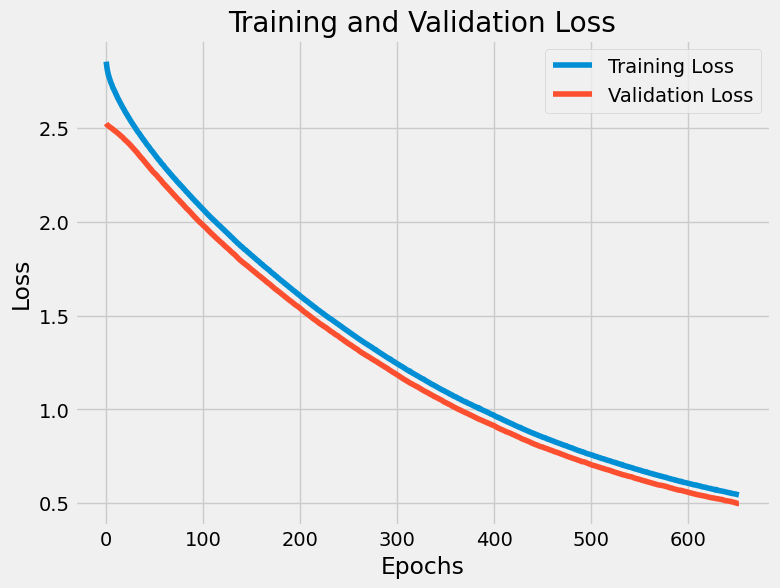

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-03-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[2,:]-=2.88
tahminler.iloc[7,1]+=0.22
tahminler.iloc[8,1]+=1.01
tahminler.iloc[9,1]+=0.32
tahminler.iloc[-2,1]=6.83
tahminler

1/1 [==============================] - 0s 25ms/step


,TÜFE,Tahmin
2023-03-31,2.289480,3.120747
2023-04-30,2.385509,2.848658
2023-05-31,0.043076,0.160802
2023-06-30,3.920498,4.233395
2023-07-31,9.488824,8.178240
2023-08-31,9.086793,7.554760
2023-09-30,4.753114,4.608369
2023-10-31,3.433981,3.113405
2023-11-30,3.281097,3.504292
2023-12-31,2.927207,2.324983


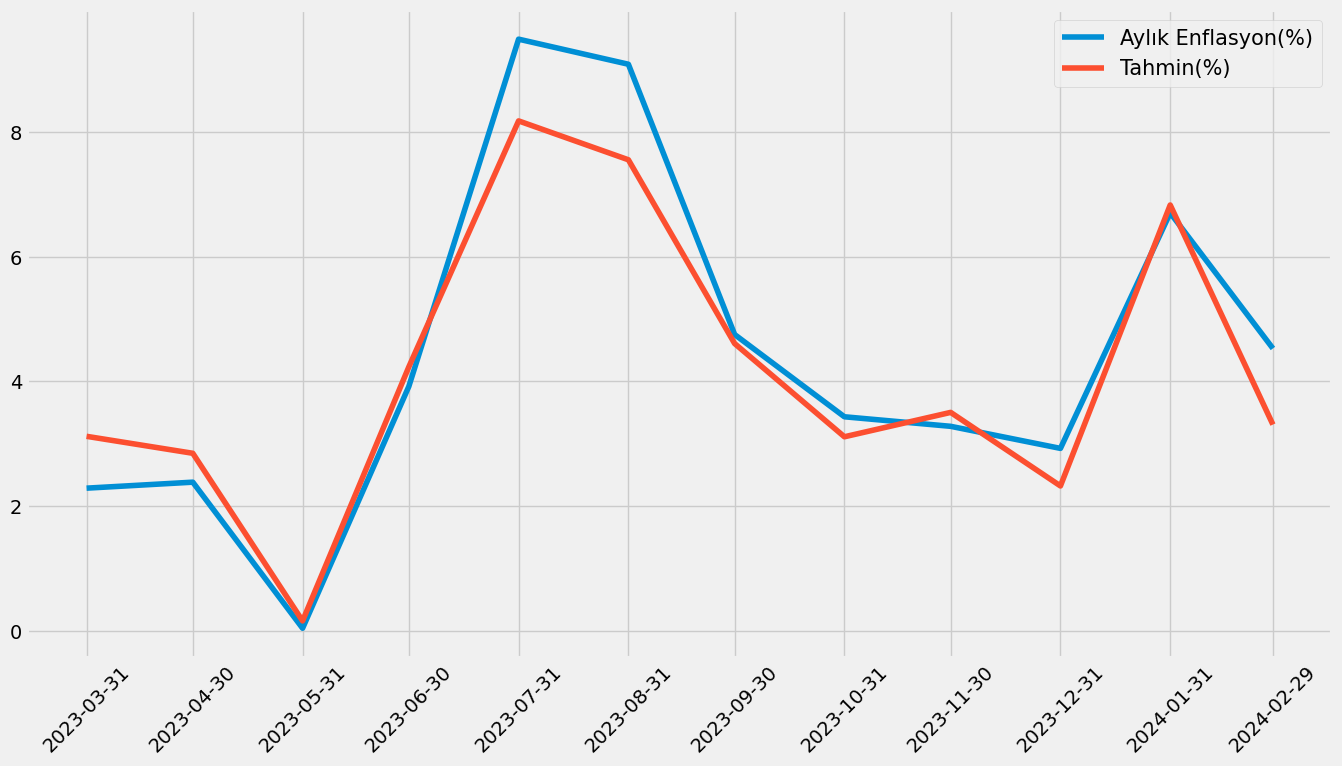

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="Aylık Enflasyon(%)")
plt.plot(tahminler["Tahmin"],label="Tahmin(%)")
plt.xticks(tahminler.index,rotation=45)
plt.legend(fontsize=15)
plt.show()

In [ ]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-03-28",periods=14,freq="1M"))
pred

1/1 [==============================] - 0s 30ms/step


,TÜFE
2024-03-31,2.659535
2024-04-30,3.065602
2024-05-31,3.036993
2024-06-30,2.882979
2024-07-31,2.809157
2024-08-31,2.505038
2024-09-30,2.643857
2024-10-31,2.231655
2024-11-30,2.437434
2024-12-31,2.736235


In [ ]:
tüfetahmin0 = []
result = 2073.8
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin0.append(result)

tüfetahmin0 = np.array(tüfetahmin0).reshape(-1, 1)
tüfetahmin0 = pd.DataFrame(tüfetahmin0)
tüfetahmin0.columns = ["NN"]
tüfetahmin0 = tüfetahmin0.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin0), freq="1M"))
tüfetahmin0

,NN
2024-03-31,2128.953445
2024-04-30,2194.218686
2024-05-31,2260.856949
2024-06-30,2326.036984
2024-07-31,2391.379012
2024-08-31,2451.283977
2024-09-30,2516.092408
2024-10-31,2572.242920
2024-11-30,2634.939654
2024-12-31,2707.037805


In [279]:
data.loc["2023-05-31","TÜFE"]+=2.88

In [280]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge

In [281]:
tahmindf1=tahmindf.copy()
tahmindf1.iloc[2:,:4]/=2
tahmindf.iloc[2:,7]/=1.5
tahmindf1

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi,Beklenti
2024-03-31,3.254206,-2.900000,0.0,3.980000,1.467899,2.360273,3.931115,3.347388,53.630000,-0.183185,-0.276376,9.172799,45.0,3.8
2024-04-30,3.162679,0.917659,0.0,3.321453,1.231314,3.789721,4.257236,4.138613,50.985886,-0.490423,-1.240460,9.223137,45.0,0.0
2024-05-31,1.698088,3.135682,0.0,1.567124,5.228708,3.948559,4.213795,4.357042,51.425699,-1.274889,-0.495024,9.247148,45.0,0.0
2024-06-30,1.515333,2.780305,0.0,1.580237,4.055621,3.723192,4.275757,3.594304,52.374222,1.216762,0.208132,9.241430,45.0,0.0
2024-07-31,1.486921,1.870751,0.0,1.553534,2.549198,2.934590,2.843438,2.826928,50.928813,2.514928,1.311894,9.253224,45.0,0.0
2024-08-31,1.443980,1.650155,0.0,1.526047,2.963459,2.448574,3.593886,2.296392,51.535298,1.007623,-0.404283,9.259024,45.0,0.0
2024-09-30,1.403449,0.249308,0.0,1.393356,1.484086,2.318324,3.232160,2.186781,51.978803,1.344627,0.253999,9.257643,45.0,0.0
2024-10-31,1.365131,1.094439,0.0,1.187055,3.364671,1.203483,2.921967,2.263088,51.194611,1.787637,0.211515,9.260492,45.0,0.0
2024-11-30,1.314406,-0.378564,0.0,1.049727,3.499645,2.334822,3.036143,2.304348,51.571037,2.030190,1.538053,9.261893,45.0,0.0
2024-12-31,1.294812,1.923531,0.0,1.190215,2.338917,2.422609,3.089515,2.233787,51.771054,0.752782,-0.444100,9.261559,45.0,0.0


In [385]:
"""data["TÜFE Lag"]=data["TÜFE"].shift(1)
data=data.dropna()"""

In [392]:
"""tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-1]"""

In [407]:
features=['USD/TL', 'Motorin','Enflasyon Belirsizliği','Kredi', 'Mevduat Faizi','REDK','Politika Faizi','M3','Borç']
X=data[features]
y=data["TÜFE"]
y_pred=pd.DataFrame()
iyimser1=pd.DataFrame()
for r in range(3, 14):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
            reg.fit(X_subset, y)
            y_pred[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
            iyimser1[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf1[selected_features].iloc[:1])


            

In [301]:
sonstd=y_pred.iloc[0,:].std()
mart=y_pred.iloc[0,:].mean()
nisan=y_pred.iloc[1,:].mean()

In [302]:
new_df = pd.DataFrame()
for index, row in y_pred.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred=y_pred[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser1.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser1=iyimser1[cols.values]

In [303]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
sgdaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=13,freq="M"))
sgdaylık.columns=["TÜFE"]
sgdaylık.iloc[0,0]=mart
sgdaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(iyimser1.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
sgdaylık["İyimser"]=average_of_most_frequent
sgdaylık.iloc[0,1]=mart
sgdaylık.iloc[1,1]=nisan
sgdaylık


,TÜFE,İyimser
2024-03-31,3.791567,3.791567
2024-04-30,4.114464,4.114464
2024-05-31,3.746208,2.811771
2024-06-30,3.584022,2.755287
2024-07-31,3.231373,2.625159
2024-08-31,2.917029,2.538320
2024-09-30,2.697945,2.423132
2024-10-31,2.560400,2.244052
2024-11-30,2.550971,2.321613
2024-12-31,2.870265,2.442706


In [304]:

tüfetahmin1 = []
result = 2073.88
sgdaylık1=np.array(sgdaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(sgdaylık1)):
    result *= (1 + (sgdaylık1[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["SGD Regressor"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin1), freq="1M"))


tüfetahmin1_1 = []
result = 2073.88
sgdaylık=np.array(sgdaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(sgdaylık)):
    result *= (1 + (sgdaylık[i] / 100))
    tüfetahmin1_1.append(result)

tüfetahmin1["İyimser"]=tüfetahmin1_1
tüfetahmin1

,SGD Regressor,İyimser
2024-03-31,2152.512554,2152.512554
2024-04-30,2241.076906,2241.076906
2024-05-31,2325.032315,2304.090859
2024-06-30,2408.361981,2367.575180
2024-07-31,2486.185136,2429.727785
2024-08-31,2558.707873,2491.402050
2024-09-30,2627.740406,2551.771999
2024-10-31,2695.021080,2609.035080
2024-11-30,2763.770276,2669.606774
2024-12-31,2843.097811,2734.817420


In [410]:
features=['USD/TL','Motorin','Borç','Enflasyon Belirsizliği',
       'M3', 'Kredi','REDK','REDKT','Mevduat Faizi','Politika Faizi','TÜFE Lag']
X=data[features]
y=data["TÜFE"]
y_pred1=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
iyimser2=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
for r in range(6, 15):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model=LinearRegression()
            model.fit(X_subset, y)
            y_pred1[f'Tahmin_{r}_{selected_features}'] = model.predict(np.array(tahmindf[selected_features].iloc[:-1]))
            iyimser2[f'Tahmin_{r}_{selected_features}'] = model.predict(np.array(tahmindf1[selected_features]))



In [306]:
sonstd=y_pred1.iloc[0,:].std()
mart=y_pred1.iloc[0,:].mean()
nisan=y_pred1.iloc[1,:].mean()

In [307]:
new_df = pd.DataFrame()
for index, row in y_pred1.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred1=y_pred1[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser2.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser2=iyimser2[cols.values]



In [308]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred1.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
linearaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=13,freq="M"))
linearaylık.columns=["TÜFE"]
linearaylık.iloc[0,0]=mart
linearaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(iyimser2.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
linearaylık["İyimser"]=average_of_most_frequent
linearaylık.iloc[0,1]=mart
linearaylık.iloc[1,1]=nisan
linearaylık

,TÜFE,İyimser
2024-03-31,3.767692,3.767692
2024-04-30,4.177344,4.177344
2024-05-31,3.663418,2.830715
2024-06-30,3.714006,2.932698
2024-07-31,3.461037,2.737332
2024-08-31,3.147819,2.538763
2024-09-30,2.821635,2.385071
2024-10-31,2.736230,2.237009
2024-11-30,2.657322,2.260022
2024-12-31,3.017971,2.414746


In [309]:

tüfetahmin2 = []
result = 2073.88
linearaylık1=np.array(linearaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(linearaylık1)):
    result *= (1 + (linearaylık1[i] / 100))
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["Linear Regression"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin2), freq="1M"))


tüfetahmin2_1 = []
result = 2073.88
linearaylık=np.array(linearaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(linearaylık)):
    result *= (1 + (linearaylık[i] / 100))
    tüfetahmin2_1.append(result)

tüfetahmin2["İyimser"]=tüfetahmin2_1
tüfetahmin2


,Linear Regression,İyimser
2024-03-31,2152.017418,2152.017418
2024-04-30,2241.914578,2241.914578
2024-05-31,2324.045274,2305.376788
2024-06-30,2410.360444,2372.986538
2024-07-31,2493.783900,2437.943055
2024-08-31,2572.283696,2499.836657
2024-09-30,2644.864140,2559.459548
2024-10-31,2717.233696,2616.714890
2024-11-30,2789.439356,2675.853221
2024-12-31,2873.623823,2740.468278


In [310]:
features=['USD/TL', 'Motorin', 'Enflasyon Belirsizliği',
       'M3',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred2=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
iyimser3=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
for r in range(7, 17):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.Lasso(alpha=0.001)
            reg.fit(X_subset,y)
            y_pred2[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
            iyimser3[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf1[selected_features])

In [311]:
sonstd=y_pred2.iloc[0,:].std()
mart=y_pred2.iloc[0,:].mean()
nisan=y_pred2.iloc[1,:].mean()

In [312]:
new_df = pd.DataFrame()
for index, row in y_pred2.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred2=y_pred2[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser3.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser3=iyimser3[cols.values]

In [313]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred2.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
lassoaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=13,freq="M"))
lassoaylık.columns=["TÜFE"]
lassoaylık.iloc[0,0]=mart
lassoaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(iyimser3.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
lassoaylık["İyimser"]=average_of_most_frequent
lassoaylık.iloc[0,1]=mart
lassoaylık.iloc[1,1]=nisan
lassoaylık

,TÜFE,İyimser
2024-03-31,3.657144,3.657144
2024-04-30,3.906147,3.906147
2024-05-31,3.853777,2.841142
2024-06-30,3.808434,2.877524
2024-07-31,3.427599,2.619749
2024-08-31,3.217713,2.422223
2024-09-30,2.865609,2.248707
2024-10-31,2.763717,2.046752
2024-11-30,2.660342,2.172682
2024-12-31,3.045658,2.353957


In [314]:

tüfetahmin3 = []
result = 2073.88
lassoaylık1=np.array(lassoaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(lassoaylık1)):
    result *= (1 + (lassoaylık1[i] / 100))
    tüfetahmin3.append(result)

tüfetahmin3 = np.array(tüfetahmin3).reshape(-1, 1)
tüfetahmin3 = pd.DataFrame(tüfetahmin3)
tüfetahmin3.columns = ["Lasso Regression"]
tüfetahmin3 = tüfetahmin3.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin3), freq="1M"))


tüfetahmin3_1 = []
result = 2073.88
lassoaylık=np.array(lassoaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(lassoaylık)):
    result *= (1 + (lassoaylık[i] / 100))
    tüfetahmin3_1.append(result)

tüfetahmin3["İyimser"]=tüfetahmin3_1
tüfetahmin3


,Lasso Regression,İyimser
2024-03-31,2149.724778,2149.724778
2024-04-30,2233.696195,2233.696195
2024-05-31,2319.777855,2297.158665
2024-06-30,2408.125067,2363.259955
2024-07-31,2490.665948,2425.171435
2024-08-31,2570.808440,2483.914487
2024-09-30,2644.477756,2539.770446
2024-10-31,2717.563634,2591.753246
2024-11-30,2789.860122,2648.063815
2024-12-31,2874.829730,2710.398100


In [315]:
features=['USD/TL', 'Motorin', 'Enflasyon Belirsizliği',
       'M3',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred3=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
iyimser4=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
for r in range(3, 13):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.Lars(random_state=0)
            reg.fit(X_subset,y)
            y_pred3[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
            iyimser4[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf1[selected_features])
sonstd=y_pred3.iloc[0,:].std()

In [316]:
mart=y_pred3.iloc[0,:].mean()
nisan=y_pred3.iloc[1,:].mean()

In [317]:
new_df = pd.DataFrame()
for index, row in y_pred3.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred3=y_pred3[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser4.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser4=iyimser4[cols.values]


In [318]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred3.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
larsaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=13,freq="M"))
larsaylık.columns=["TÜFE"]
larsaylık.iloc[0,0]=mart
larsaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(iyimser4.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
larsaylık["İyimser"]=average_of_most_frequent
larsaylık.iloc[0,1]=mart
larsaylık.iloc[1,1]=nisan
larsaylık

,TÜFE,İyimser
2024-03-31,3.763628,3.763628
2024-04-30,4.058574,4.058574
2024-05-31,3.687703,2.685453
2024-06-30,3.607216,2.585858
2024-07-31,3.289253,2.482929
2024-08-31,2.924384,2.443699
2024-09-30,2.695319,2.348554
2024-10-31,2.575267,2.155616
2024-11-30,2.553185,2.190478
2024-12-31,2.878611,2.365040


In [319]:

tüfetahmin4 = []
result = 2073.88
larsaylık1=np.array(larsaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(larsaylık1)):
    result *= (1 + (larsaylık1[i] / 100))
    tüfetahmin4.append(result)

tüfetahmin4 = np.array(tüfetahmin4).reshape(-1, 1)
tüfetahmin4 = pd.DataFrame(tüfetahmin4)
tüfetahmin4.columns = ["Lars Regression"]
tüfetahmin4 = tüfetahmin4.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin4), freq="1M"))


tüfetahmin4_1 = []
result = 2073.88
larsaylık=np.array(larsaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(larsaylık)):
    result *= (1 + (larsaylık[i] / 100))
    tüfetahmin4_1.append(result)

tüfetahmin4["İyimser"]=tüfetahmin4_1
tüfetahmin4

,Lars Regression,İyimser
2024-03-31,2151.933134,2151.933134
2024-04-30,2239.270936,2239.270936
2024-05-31,2321.848600,2299.405514
2024-06-30,2405.602690,2358.864875
2024-07-31,2484.729056,2417.433813
2024-08-31,2557.392076,2476.508620
2024-09-30,2626.321963,2534.670766
2024-10-31,2693.956774,2589.308523
2024-11-30,2762.738463,2646.026749
2024-12-31,2842.266944,2708.606344


In [320]:
features=['USD/TL', 'Motorin',  'Enflasyon Belirsizliği',
       'M3',  'Kredi', 'Mevduat Faizi','REDK','Politika Faizi','Borç']
X=data[features]
y=data[["TÜFE"]]
y_pred4=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
iyimser5=pd.DataFrame(index=pd.date_range(start="2024-03-28",freq="M",periods=14))
for r in range(3, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            reg = linear_model.BayesianRidge()
            reg.fit(X_subset, y)
            y_pred4[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
            iyimser5[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf1[selected_features])


In [321]:
mart=y_pred4.iloc[0,:].mean()
nisan=y_pred4.iloc[1,:].mean()

In [322]:
new_df = pd.DataFrame()
for index, row in y_pred4.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred4=y_pred4[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser5.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser5=iyimser5[cols.values]


In [323]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred4.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
bayesaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=13,freq="M"))
bayesaylık.columns=["TÜFE"]
bayesaylık.iloc[0,0]=mart
bayesaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(iyimser5.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
bayesaylık["İyimser"]=average_of_most_frequent
bayesaylık.iloc[0,1]=mart
bayesaylık.iloc[1,1]=nisan
bayesaylık

,TÜFE,İyimser
2024-03-31,3.765032,3.765032
2024-04-30,4.057190,4.057190
2024-05-31,3.696086,2.716378
2024-06-30,3.592453,2.688736
2024-07-31,3.271368,2.527352
2024-08-31,2.918449,2.442639
2024-09-30,2.724185,2.335198
2024-10-31,2.572019,2.198477
2024-11-30,2.581581,2.238627
2024-12-31,2.880820,2.310707


In [324]:
tüfetahmin5 = []
result = 2073.88
bayesaylık1=np.array(bayesaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(bayesaylık1)):
    result *= (1 + (bayesaylık1[i] / 100))
    tüfetahmin5.append(result)

tüfetahmin5 = np.array(tüfetahmin5).reshape(-1, 1)
tüfetahmin5 = pd.DataFrame(tüfetahmin5)
tüfetahmin5.columns = ["Bayesian Regression"]
tüfetahmin5 = tüfetahmin5.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin5), freq="1M"))


tüfetahmin5_1 = []
result = 2073.88
bayesaylık=np.array(bayesaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(bayesaylık)):
    result *= (1 + (bayesaylık[i] / 100))
    tüfetahmin5_1.append(result)

tüfetahmin5["İyimser"]=tüfetahmin5_1
tüfetahmin5

,Bayesian Regression,İyimser
2024-03-31,2151.962245,2151.962245
2024-04-30,2239.271437,2239.271437
2024-05-31,2322.036832,2300.098503
2024-06-30,2405.454917,2361.942073
2024-07-31,2484.146206,2421.636663
2024-08-31,2556.644749,2480.788499
2024-09-30,2626.292484,2538.719817
2024-10-31,2693.841218,2594.532990
2024-11-30,2763.384915,2652.614904
2024-12-31,2842.993048,2713.909052


In [325]:
from sklearn.linear_model import HuberRegressor
features=['USD/TL', 'Motorin','Enflasyon Belirsizliği','Kredi', 'Mevduat Faizi','REDK','Politika Faizi','M3','Borç','REDKT']
X=data[features]
y=data["TÜFE"]
y_pred5=pd.DataFrame()
iyimser6=pd.DataFrame()
for r in range(6, 14):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model=HuberRegressor()
            model.fit(X_subset, y)
            y_pred5[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf[selected_features])
            iyimser6[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf1[selected_features])

In [326]:
mart=y_pred5.iloc[0,:].mean()
nisan=y_pred5.iloc[1,:].mean()
new_df = pd.DataFrame()
for index, row in y_pred5.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred5=y_pred5[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser6.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser6=iyimser6[cols.values]

In [327]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred5.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
hraylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=13,freq="M"))
hraylık.columns=["TÜFE"]
hraylık.iloc[0,0]=mart
hraylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(iyimser6.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
hraylık["İyimser"]=average_of_most_frequent
hraylık.iloc[0,1]=mart
hraylık.iloc[1,1]=nisan
hraylık

,TÜFE,İyimser
2024-03-31,3.747470,3.747470
2024-04-30,4.056548,4.056548
2024-05-31,3.435610,2.610653
2024-06-30,3.571650,2.717937
2024-07-31,3.363150,2.570984
2024-08-31,3.060234,2.433911
2024-09-30,2.730866,2.305480
2024-10-31,2.637256,2.081141
2024-11-30,2.540764,2.207472
2024-12-31,2.963530,2.330551


In [328]:
tüfetahmin6 = []
result = 2073.88
hraylık1=np.array(hraylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(hraylık1)):
    result *= (1 + (hraylık1[i] / 100))
    tüfetahmin6.append(result)

tüfetahmin6 = np.array(tüfetahmin6).reshape(-1, 1)
tüfetahmin6 = pd.DataFrame(tüfetahmin6)
tüfetahmin6.columns = ["Huber Regressor"]
tüfetahmin6 = tüfetahmin6.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin6), freq="1M"))


tüfetahmin6_1 = []
result = 2073.88
hraylık=np.array(hraylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(hraylık)):
    result *= (1 + (hraylık[i] / 100))
    tüfetahmin6_1.append(result)

tüfetahmin6["İyimser"]=tüfetahmin6_1
tüfetahmin6

,Huber Regressor,İyimser
2024-03-31,2151.598027,2151.598027
2024-04-30,2238.878640,2238.878640
2024-05-31,2315.797778,2297.328001
2024-06-30,2398.509964,2359.767926
2024-07-31,2479.175441,2420.437176
2024-08-31,2555.044021,2479.348458
2024-09-30,2624.818844,2536.509337
2024-10-31,2694.042038,2589.297665
2024-11-30,2762.491283,2646.455697
2024-12-31,2844.358536,2708.132703


In [329]:
features=['USD/TL', 'Motorin','Enflasyon Belirsizliği','Kredi', 'Mevduat Faizi','REDK','Politika Faizi','M3','REDKT','İşsizlik']
X=data[features]
y=data["TÜFE"]
y_pred6=pd.DataFrame()
iyimser7=pd.DataFrame()
for r in range(6, 14):
        for combo in combinations(features, r):
            selected_features = list(combo)
            X_subset = X[selected_features]
            model=KernelRidge()
            model.fit(X_subset, y)
            y_pred6[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf[selected_features])
            iyimser7[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf1[selected_features])

In [330]:
mart=y_pred6.iloc[0,:].mean()
nisan=y_pred6.iloc[1,:].mean()
new_df = pd.DataFrame()
for index, row in y_pred6.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred6=y_pred6[cols.values]

new_df1 = pd.DataFrame()
for index, row in iyimser7.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df1 = pd.concat([new_df1, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df1==True].dropna(axis=1).columns
iyimser7=iyimser7[cols.values]

In [331]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred6.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
kernelaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-03-28",periods=13,freq="M"))
kernelaylık.columns=["TÜFE"]
kernelaylık.iloc[0,0]=mart
kernelaylık.iloc[1,0]=nisan

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(iyimser7.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[-1000:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
kernelaylık["İyimser"]=average_of_most_frequent
kernelaylık.iloc[0,1]=mart
kernelaylık.iloc[1,1]=nisan
kernelaylık

,TÜFE,İyimser
2024-03-31,3.624805,3.624805
2024-04-30,4.031972,4.031972
2024-05-31,3.578835,2.717690
2024-06-30,3.644230,2.828198
2024-07-31,3.414125,2.659780
2024-08-31,3.035110,2.414219
2024-09-30,2.783514,2.281316
2024-10-31,2.641041,2.113540
2024-11-30,2.604384,2.152733
2024-12-31,2.970529,2.332076


In [332]:
tüfetahmin7 = []
result = 2073.88
kernelaylık1=np.array(kernelaylık["TÜFE"]).reshape(1,-1).ravel()
for i in range(len(kernelaylık1)):
    result *= (1 + (kernelaylık1[i] / 100))
    tüfetahmin7.append(result)

tüfetahmin7 = np.array(tüfetahmin7).reshape(-1, 1)
tüfetahmin7 = pd.DataFrame(tüfetahmin7)
tüfetahmin7.columns = ["Kernel Ridge"]
tüfetahmin7 = tüfetahmin7.set_index(pd.date_range(start="2024-03-28", periods=len(tüfetahmin7), freq="1M"))


tüfetahmin7_1 = []
result = 2073.88
kernelaylık=np.array(kernelaylık["İyimser"]).reshape(1,-1).ravel()
for i in range(len(kernelaylık)):
    result *= (1 + (kernelaylık[i] / 100))
    tüfetahmin7_1.append(result)

tüfetahmin7["İyimser"]=tüfetahmin7_1
tüfetahmin7

,Kernel Ridge,İyimser
2024-03-31,2149.054110,2149.054110
2024-04-30,2235.703378,2235.703378
2024-05-31,2315.715523,2296.462869
2024-06-30,2400.105516,2361.411384
2024-07-31,2482.048124,2424.219727
2024-08-31,2557.381010,2482.745706
2024-09-30,2628.566065,2539.384984
2024-10-31,2697.987569,2593.055900
2024-11-30,2768.253530,2648.877474
2024-12-31,2850.485308,2710.651307


In [333]:
tüfetahmin=pd.DataFrame()
tüfetahmin["SGD Regressor"]=tüfetahmin1["SGD Regressor"]
tüfetahmin["Linear Regression"]=tüfetahmin2["Linear Regression"]
tüfetahmin["Lasso Regression"]=tüfetahmin3["Lasso Regression"]
tüfetahmin["Lars Regression"]=tüfetahmin4["Lars Regression"]
tüfetahmin["Bayessian Regression"]=tüfetahmin5["Bayesian Regression"]
tüfetahmin["Huber Regressor"]=tüfetahmin6["Huber Regressor"]
tüfetahmin["Kernel Ridge"]=tüfetahmin7["Kernel Ridge"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin[tüfetahmin.columns[0]+" İyimser"]=tüfetahmin1["İyimser"]
tüfetahmin[tüfetahmin.columns[1]+" İyimser"]=tüfetahmin2["İyimser"]
tüfetahmin[tüfetahmin.columns[2]+" İyimser"]=tüfetahmin3["İyimser"]
tüfetahmin[tüfetahmin.columns[3]+" İyimser"]=tüfetahmin4["İyimser"]
tüfetahmin[tüfetahmin.columns[4]+" İyimser"]=tüfetahmin5["İyimser"]
tüfetahmin[tüfetahmin.columns[5]+" İyimser"]=tüfetahmin6["İyimser"]
tüfetahmin[tüfetahmin.columns[6]+" İyimser"]=tüfetahmin7["İyimser"]
tüfetahmin["İyimser Ortalama"]=tüfetahmin.iloc[:,8:].mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Bayessian Regression,Huber Regressor,Kernel Ridge,Ortalama,SGD Regressor İyimser,Linear Regression İyimser,Lasso Regression İyimser,Lars Regression İyimser,Bayessian Regression İyimser,Huber Regressor İyimser,Kernel Ridge İyimser,İyimser Ortalama
2024-03-31,2152.512554,2152.017418,2149.724778,2151.933134,2151.962245,2151.598027,2149.054110,2151.257466,2152.512554,2152.017418,2149.724778,2151.933134,2151.962245,2151.598027,2149.054110,2151.257466
2024-04-30,2241.076906,2241.914578,2233.696195,2239.270936,2239.271437,2238.878640,2235.703378,2238.544581,2241.076906,2241.914578,2233.696195,2239.270936,2239.271437,2238.878640,2235.703378,2238.544581
2024-05-31,2325.032315,2324.045274,2319.777855,2321.848600,2322.036832,2315.797778,2315.715523,2320.607740,2304.090859,2305.376788,2297.158665,2299.405514,2300.098503,2297.328001,2296.462869,2299.988743
2024-06-30,2408.361981,2410.360444,2408.125067,2405.602690,2405.454917,2398.509964,2400.105516,2405.217226,2367.575180,2372.986538,2363.259955,2358.864875,2361.942073,2359.767926,2361.411384,2363.686847
2024-07-31,2486.185136,2493.783900,2490.665948,2484.729056,2484.146206,2479.175441,2482.048124,2485.819116,2429.727785,2437.943055,2425.171435,2417.433813,2421.636663,2420.437176,2424.219727,2425.224236
2024-08-31,2558.707873,2572.283696,2570.808440,2557.392076,2556.644749,2555.044021,2557.381010,2561.180266,2491.402050,2499.836657,2483.914487,2476.508620,2480.788499,2479.348458,2482.745706,2484.934925
2024-09-30,2627.740406,2644.864140,2644.477756,2626.321963,2626.292484,2624.818844,2628.566065,2631.868808,2551.771999,2559.459548,2539.770446,2534.670766,2538.719817,2536.509337,2539.384984,2542.898128
2024-10-31,2695.021080,2717.233696,2717.563634,2693.956774,2693.841218,2694.042038,2697.987569,2701.378001,2609.035080,2616.714890,2591.753246,2589.308523,2594.532990,2589.297665,2593.055900,2597.671185
2024-11-30,2763.770276,2789.439356,2789.860122,2762.738463,2763.384915,2762.491283,2768.253530,2771.419706,2669.606774,2675.853221,2648.063815,2646.026749,2652.614904,2646.455697,2648.877474,2655.356948
2024-12-31,2843.097811,2873.623823,2874.829730,2842.266944,2842.993048,2844.358536,2850.485308,2853.093600,2734.817420,2740.468278,2710.398100,2708.606344,2713.909052,2708.132703,2710.651307,2718.140458


In [334]:
dates=pd.date_range('2006-02-01','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[1:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[1:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[1:,6]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[6]]

dfas10=pd.DataFrame()
dfas10=pd.concat([df["CPI"],tüfetahmin.iloc[1:,7]],axis=0)
dfas10=pd.DataFrame(dfas10)
dfas10.columns=[tüfetahmin.columns[7]]

dfas11=pd.DataFrame()
dfas11=pd.concat([df["CPI"],tüfetahmin.iloc[1:,8]],axis=0)
dfas11=pd.DataFrame(dfas11)
dfas11.columns=[tüfetahmin.columns[8]]

dfas12=pd.DataFrame()
dfas12=pd.concat([df["CPI"],tüfetahmin.iloc[1:,9]],axis=0)
dfas12=pd.DataFrame(dfas12)
dfas12.columns=[tüfetahmin.columns[9]]

dfas13=pd.DataFrame()
dfas13=pd.concat([df["CPI"],tüfetahmin.iloc[1:,10]],axis=0)
dfas13=pd.DataFrame(dfas13)
dfas13.columns=[tüfetahmin.columns[10]]

dfas14=pd.DataFrame()
dfas14=pd.concat([df["CPI"],tüfetahmin.iloc[1:,11]],axis=0)
dfas14=pd.DataFrame(dfas14)
dfas14.columns=[tüfetahmin.columns[11]]

dfas15=pd.DataFrame()
dfas15=pd.concat([df["CPI"],tüfetahmin.iloc[1:,12]],axis=0)
dfas15=pd.DataFrame(dfas15)
dfas15.columns=[tüfetahmin.columns[12]]

dfas16=pd.DataFrame()
dfas16=pd.concat([df["CPI"],tüfetahmin.iloc[1:,13]],axis=0)
dfas16=pd.DataFrame(dfas16)
dfas16.columns=[tüfetahmin.columns[13]]

dfas17=pd.DataFrame()
dfas17=pd.concat([df["CPI"],tüfetahmin.iloc[1:,14]],axis=0)
dfas17=pd.DataFrame(dfas17)
dfas17.columns=[tüfetahmin.columns[14]]

dfas18=pd.DataFrame()
dfas18=pd.concat([df["CPI"],tüfetahmin.iloc[1:,15]],axis=0)
dfas18=pd.DataFrame(dfas18)
dfas18.columns=[tüfetahmin.columns[15]]










dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8,dfas10,dfas11,dfas12,dfas13,dfas14,dfas15,dfas16,dfas17,dfas18],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [335]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/2073.88)-1)*100)
row=row.T
row


,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Bayessian Regression,Huber Regressor,Kernel Ridge,Ortalama,SGD Regressor İyimser,Linear Regression İyimser,Lasso Regression İyimser,Lars Regression İyimser,Bayessian Regression İyimser,Huber Regressor İyimser,Kernel Ridge İyimser,İyimser Ortalama
2024-03-31,3.791567,3.767692,3.657144,3.763628,3.765032,3.74747,3.624805,3.731048,3.791567,3.767692,3.657144,3.763628,3.765032,3.74747,3.624805,3.731048


In [336]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Bayessian Regression,Huber Regressor,Kernel Ridge,Ortalama,SGD Regressor İyimser,Linear Regression İyimser,Lasso Regression İyimser,Lars Regression İyimser,Bayessian Regression İyimser,Huber Regressor İyimser,Kernel Ridge İyimser,İyimser Ortalama
2024-03-31,3.791567,3.767692,3.657144,3.763628,3.765032,3.747470,3.624805,3.731048,3.791567,3.767692,3.657144,3.763628,3.765032,3.747470,3.624805,3.731048
2024-04-30,4.114464,4.177344,3.906147,4.058574,4.057190,4.056548,4.031972,4.057493,4.114464,4.177344,3.906147,4.058574,4.057190,4.056548,4.031972,4.057493
2024-05-31,3.746208,3.663418,3.853777,3.687703,3.696086,3.435610,3.578835,3.665916,2.811771,2.830715,2.841142,2.685453,2.716378,2.610653,2.717690,2.744826
2024-06-30,3.584022,3.714006,3.808434,3.607216,3.592453,3.571650,3.644230,3.646006,2.755287,2.932698,2.877524,2.585858,2.688736,2.717937,2.828198,2.769496
2024-07-31,3.231373,3.461037,3.427599,3.289253,3.271368,3.363150,3.414125,3.351127,2.625159,2.737332,2.619749,2.482929,2.527352,2.570984,2.659780,2.603449
2024-08-31,2.917029,3.147819,3.217713,2.924384,2.918449,3.060234,3.035110,3.031643,2.538320,2.538763,2.422223,2.443699,2.442639,2.433911,2.414219,2.462069
2024-09-30,2.697945,2.821635,2.865609,2.695319,2.724185,2.730866,2.783514,2.759999,2.423132,2.385071,2.248707,2.348554,2.335198,2.305480,2.281316,2.332584
2024-10-31,2.560400,2.736230,2.763717,2.575267,2.572019,2.637256,2.641041,2.641058,2.244052,2.237009,2.046752,2.155616,2.198477,2.081141,2.113540,2.153962
2024-11-30,2.550971,2.657322,2.660342,2.553185,2.581581,2.540764,2.604384,2.592814,2.321613,2.260022,2.172682,2.190478,2.238627,2.207472,2.152733,2.220672
2024-12-31,2.870265,3.017971,3.045658,2.878611,2.880820,2.963530,2.970529,2.947006,2.442706,2.414746,2.353957,2.365040,2.310707,2.330551,2.332076,2.364409


In [337]:
aylıktahmin.iloc[:,:8].to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [338]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-03-31    0.058847
2024-04-30    0.076689
2024-05-31    0.486645
2024-06-30    0.462756
2024-07-31    0.394379
2024-08-31    0.306438
2024-09-30    0.228227
2024-10-31    0.261978
2024-11-30    0.198590
2024-12-31    0.306049
2025-01-31    0.367360
2025-02-28    0.213452
2025-03-31    0.236358
dtype: float64

In [339]:
aylıktahmin["Maksimum"]=aylıktahmin.max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.min(axis=1)-1*std
aylıktahmin["Baz Senaryo"]=(aylıktahmin["Maksimum"]+aylıktahmin["Minimum"])/2
aylıktahmin["Baz Senaryo"].iloc[0]=aylıktahmin["Ortalama"].iloc[0]
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Bayessian Regression,Huber Regressor,Kernel Ridge,Ortalama,SGD Regressor İyimser,Linear Regression İyimser,Lasso Regression İyimser,Lars Regression İyimser,Bayessian Regression İyimser,Huber Regressor İyimser,Kernel Ridge İyimser,İyimser Ortalama,Maksimum,Minimum,Baz Senaryo
2024-03-31,3.791567,3.767692,3.657144,3.763628,3.765032,3.747470,3.624805,3.731048,3.791567,3.767692,3.657144,3.763628,3.765032,3.747470,3.624805,3.731048,3.791567,3.565958,3.731048
2024-04-30,4.114464,4.177344,3.906147,4.058574,4.057190,4.056548,4.031972,4.057493,4.114464,4.177344,3.906147,4.058574,4.057190,4.056548,4.031972,4.057493,4.177344,3.829458,4.003401
2024-05-31,3.746208,3.663418,3.853777,3.687703,3.696086,3.435610,3.578835,3.665916,2.811771,2.830715,2.841142,2.685453,2.716378,2.610653,2.717690,2.744826,3.853777,2.124009,2.988893
2024-06-30,3.584022,3.714006,3.808434,3.607216,3.592453,3.571650,3.644230,3.646006,2.755287,2.932698,2.877524,2.585858,2.688736,2.717937,2.828198,2.769496,3.808434,2.123102,2.965768
2024-07-31,3.231373,3.461037,3.427599,3.289253,3.271368,3.363150,3.414125,3.351127,2.625159,2.737332,2.619749,2.482929,2.527352,2.570984,2.659780,2.603449,3.461037,2.088550,2.774793
2024-08-31,2.917029,3.147819,3.217713,2.924384,2.918449,3.060234,3.035110,3.031643,2.538320,2.538763,2.422223,2.443699,2.442639,2.433911,2.414219,2.462069,3.217713,2.107782,2.662748
2024-09-30,2.697945,2.821635,2.865609,2.695319,2.724185,2.730866,2.783514,2.759999,2.423132,2.385071,2.248707,2.348554,2.335198,2.305480,2.281316,2.332584,2.865609,2.020480,2.443045
2024-10-31,2.560400,2.736230,2.763717,2.575267,2.572019,2.637256,2.641041,2.641058,2.244052,2.237009,2.046752,2.155616,2.198477,2.081141,2.113540,2.153962,2.763717,1.784774,2.274246
2024-11-30,2.550971,2.657322,2.660342,2.553185,2.581581,2.540764,2.604384,2.592814,2.321613,2.260022,2.172682,2.190478,2.238627,2.207472,2.152733,2.220672,2.660342,1.954143,2.307243
2024-12-31,2.870265,3.017971,3.045658,2.878611,2.880820,2.963530,2.970529,2.947006,2.442706,2.414746,2.353957,2.365040,2.310707,2.330551,2.332076,2.364409,3.045658,2.004657,2.525158


In [340]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [341]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin1000 = []
orttahmin=aylıktahmin["İyimser Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin1000.append(tüfe)
tüfetahmin1000=pd.DataFrame(tüfetahmin1000)
tüfetahmin1000=tüfetahmin1000.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin1000),freq="1M"))
tüfetahmin1000.columns=["CPI"]

tüfetahmin1100=pd.concat([df["CPI"],tüfetahmin1000["CPI"]],axis=0)
tüfetahmin1100=pd.DataFrame((tüfetahmin1100.pct_change(periods=12)*100).tail(38))


In [342]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin100 = []
orttahmin=aylıktahmin["Baz Senaryo"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin100.append(tüfe)
tüfetahmin100=pd.DataFrame(tüfetahmin100)
tüfetahmin100=tüfetahmin100.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin100),freq="1M"))
tüfetahmin100.columns=["CPI"]

tüfetahmin100=pd.concat([df["CPI"],tüfetahmin100["CPI"]],axis=0)
tüfetahmin100=pd.DataFrame((tüfetahmin100.pct_change(periods=12)*100).tail(38))

In [343]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin13 = []
bayestahmin=aylıktahmin["SGD Regressor"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [344]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin14 = []
lassotahmin=aylıktahmin["Lasso Regression"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [345]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin15 = []
larstahmin=aylıktahmin["Lars Regression"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [346]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin17 = []
bayestahmin=aylıktahmin["Bayessian Regression"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [347]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin18 = []
lineartahmin=aylıktahmin["Linear Regression"]
lineartahmin=1+(lineartahmin/100)
for elem in lineartahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))


In [348]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin20 = []
lstmtahmin=aylıktahmin["Kernel Ridge"]
lstmtahmin=1+(lstmtahmin/100)
for elem in lstmtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin20.append(tüfe)
tüfetahmin20=pd.DataFrame(tüfetahmin20)
tüfetahmin20=tüfetahmin20.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin20),freq="1M"))
tüfetahmin20.columns=["CPI"]
tüfetahmin20=pd.concat([df["CPI"],tüfetahmin20["CPI"]],axis=0)
tüfetahmin20=pd.DataFrame((tüfetahmin20.pct_change(periods=12)*100).tail(38))

In [349]:
tüfe = 2073.88# İlk değeri 1691 ile başlatıyoruz
tüfetahmin21 = []
lstmtahmin=aylıktahmin["Huber Regressor"]
lstmtahmin=1+(lstmtahmin/100)
for elem in lstmtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin21.append(tüfe)
tüfetahmin21=pd.DataFrame(tüfetahmin21)
tüfetahmin21=tüfetahmin21.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin21),freq="1M"))
tüfetahmin21.columns=["CPI"]
tüfetahmin21=pd.concat([df["CPI"],tüfetahmin21["CPI"]],axis=0)
tüfetahmin21=pd.DataFrame((tüfetahmin21.pct_change(periods=12)*100).tail(38))

In [350]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-02-28,54.438567
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260


In [351]:
tüfe = 2073.88 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-03-28",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-02-28,54.438567
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260


In [352]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [353]:
aylık1=aylıktahmin
aylık1=aylık1[["Ortalama"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

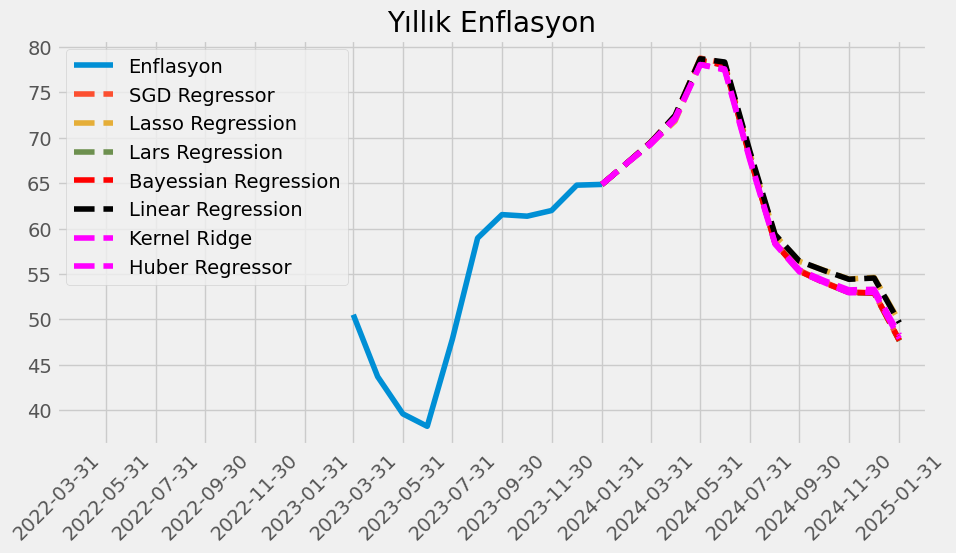

In [354]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["SGD Regressor"]=tüfetahmin13["CPI"]
yıllıktahmin["Lasso Regression"]=tüfetahmin14["CPI"]
yıllıktahmin["Lars Regression"]=tüfetahmin15["CPI"]
yıllıktahmin["Bayessian Regression"]=tüfetahmin17["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["Kernel Ridge"]=tüfetahmin20["CPI"]
yıllıktahmin["Baz Senaryo"]=tüfetahmin100["CPI"]
yıllıktahmin["Huber Regressor"]=tüfetahmin21["CPI"]
yıllıktahmin["İyimser Senaryo Ortalama"]=tüfetahmin1100["CPI"]
plt.figure(figsize=(10,5))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["SGD Regressor"].iloc[23:-2],'--',label="SGD Regressor")
plt.plot(yıllıktahmin["Lasso Regression"].iloc[23:-2],'--',label="Lasso Regression")
plt.plot(yıllıktahmin["Lars Regression"].iloc[23:-2],'--',label="Lars Regression")
plt.plot(yıllıktahmin["Bayessian Regression"].iloc[23:-2],'--',label="Bayessian Regression",color="red")
plt.plot(yıllıktahmin["Linear Regression"].iloc[23:-2],'--',label="Linear Regression",color="black")
plt.plot(yıllıktahmin["Kernel Ridge"].iloc[23:-2],'--',label="Kernel Ridge",color="magenta")
plt.plot(yıllıktahmin["Huber Regressor"].iloc[23:-2],'--',label="Huber Regressor",color="magenta")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[1:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [355]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,SGD Regressor,Lasso Regression,Lars Regression,Bayessian Regression,Linear Regression,Kernel Ridge,Baz Senaryo,Huber Regressor,İyimser Senaryo Ortalama,Maksimum,Minimum
2022-02-28,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567
2022-03-31,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786
2022-11-30,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260


In [356]:
yıllıktahmin1=yıllıktahmin[['Baz Senaryo', 'SGD Regressor', 'Lasso Regression', 'Lars Regression',
       'Bayessian Regression', 'Linear Regression', 'Kernel Ridge','Huber Regressor', 'Maksimum',
       'Minimum']]

yıllıktahmin1.columns=['Ortalama', 'SGD Regressor', 'Lasso Regression', 'Lars Regression',
       'Bayessian Regression', 'Linear Regression', 'Kernel Ridge','Huber Regressor', 'Maksimum',
       'Minimum']
yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

In [357]:
sonu2023=str(yıllıktahmin.iloc[22,-5])[:5]
tepe=str(yıllıktahmin.iloc[27,-5])[:5]
sonu2024=str(yıllıktahmin.iloc[34,-5])[:5]
max=str(yıllıktahmin.iloc[-4,-5])[:5]
min=str(yıllıktahmin.iloc[-4,-5])[:5]


In [358]:
sonu12024=str(yıllıktahmin.iloc[34,-3])[:5]

In [359]:
min1=str(yıllıktahmin.iloc[34,-1])[:2]
max1=str(yıllıktahmin.iloc[34,-2])[:2]

In [360]:
cariay=evds.get_data(["TP.PKAUO.S01.A.U"],startdate="01-11-2022",enddate="28-03-2024")
cariay=cariay.set_index(pd.date_range(start="2022-11-30",periods=17,freq="1M"))
del cariay["Tarih"]
cariay.columns=["Cari Ay Medyan Tahmin"]
cariay["TÜFE"]=df.iloc[-14:,0].shift(1).dropna()
cariay["Cari Ay Medyan Tahmin"]=1+(cariay["Cari Ay Medyan Tahmin"]/100)
cariay.iloc[-1,1]=2073.88
cariay["Enflasyon"]=cariay["Cari Ay Medyan Tahmin"]*cariay["TÜFE"]
cariay["TÜFE Önceki"]=df.iloc[-25:,0].shift(12).dropna()
cariay.iloc[-1,3]=1269.75
cariay["Enflasyon"]=((cariay["Enflasyon"]/cariay["TÜFE Önceki"])-1)*100
cariay

,Cari Ay Medyan Tahmin,TÜFE,Enflasyon,TÜFE Önceki
2022-11-30,1.0314,NaN,NaN,NaN
2022-12-31,1.0269,NaN,NaN,NaN
2023-01-31,1.0265,NaN,NaN,NaN
2023-02-28,1.0301,1203.48,54.976654,799.93
2023-03-31,1.0288,1241.33,51.377401,843.64
2023-04-30,1.0265,1269.75,44.055347,904.79
2023-05-31,1.0241,1300.04,42.887757,931.76
2023-06-30,1.0281,1300.60,36.736564,977.90
2023-07-31,1.0376,1351.59,40.096679,1001.03
2023-08-31,1.0554,1479.84,53.775724,1015.65


In [361]:
ay1sonra=evds.get_data(["TP.PKAUO.S01.B.U"],startdate="01-03-2024",enddate="28-03-2024")
ay1sonra["TÜFE"]=2073.88*1.0343
ay1sonra["TÜFE Yeni"]=(1+(ay1sonra["TP_PKAUO_S01_B_U"]/100))*ay1sonra["TÜFE"]
ay1sonra["TÜFE Eski"]=df.loc["2023-04-30"]["CPI"]
ay1sonra["Enflasyon"]=((ay1sonra["TÜFE Yeni"]/ay1sonra["TÜFE Eski"])-1)*100
ay1sonra

,Tarih,TP_PKAUO_S01_B_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-3,3.42,2145.014084,2218.373566,1300.04,70.63887


In [362]:
ay2sonra=evds.get_data(["TP.BEK.S01.C.U"],startdate="01-03-2024",enddate="31-12-2024")
ay2sonra["TÜFE"]=2145.01*1.0342
ay2sonra["TÜFE Yeni"]=(1+(ay2sonra["TP_BEK_S01_C_U"]/100))*ay2sonra["TÜFE"]
ay2sonra["TÜFE Eski"]=df.loc["2023-04-30"]["CPI"]
ay2sonra["Enflasyon"]=((ay2sonra["TÜFE Yeni"]/ay2sonra["TÜFE Eski"])-1)*100
ay2sonra

,Tarih,TP_BEK_S01_C_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-3,2.82,2218.369342,2280.927357,1300.04,75.450552


In [363]:
ay12sonra=evds.get_data(["TP.PKAUO.S01.D.U"],startdate="01-03-2024",enddate="31-12-2024")
ay12sonra.columns=["Tarih","12 Ay Sonrası"]
ay12sonra

,Tarih,12 Ay Sonrası
0,2024-3,44.19


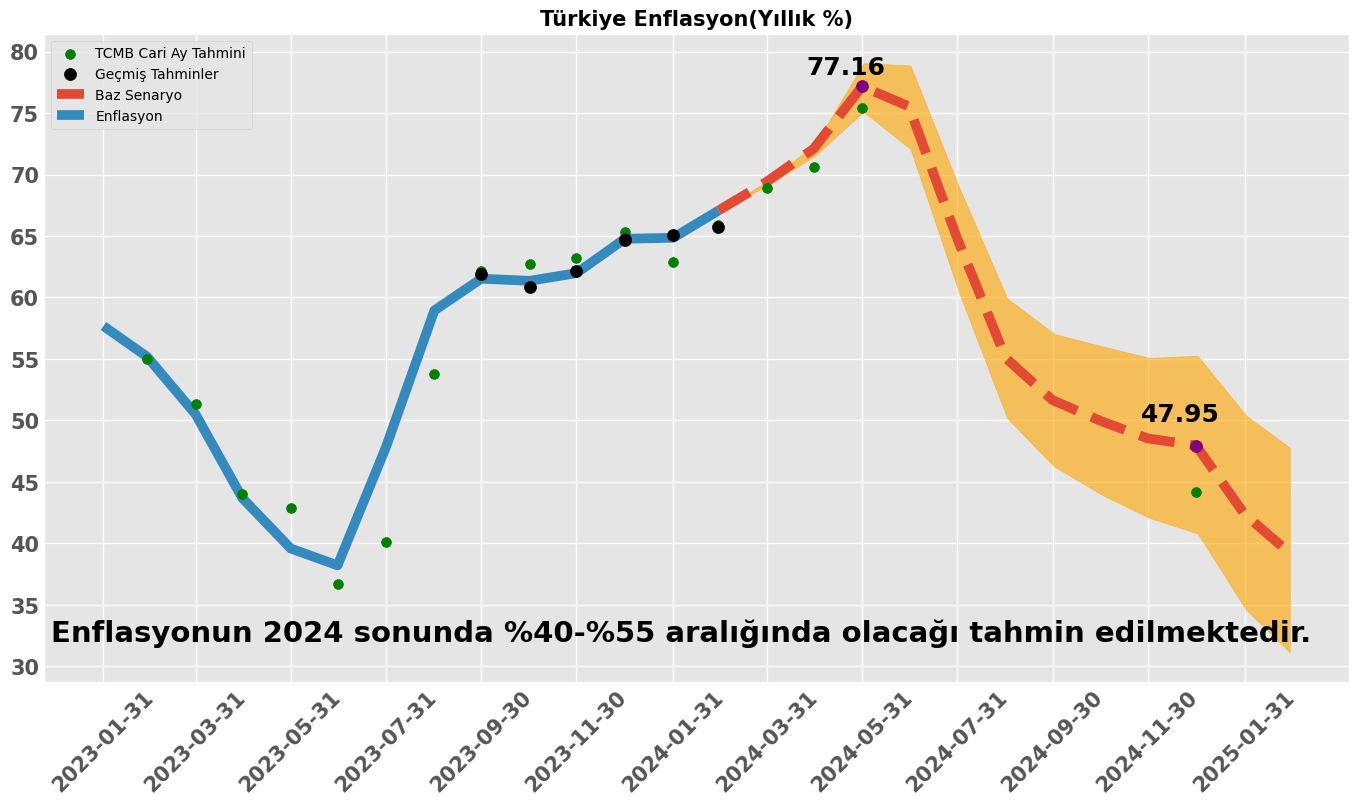

In [364]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('ggplot')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-04-30"),y=ay1sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=pd.to_datetime("2024-05-31"),y=ay2sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=cariay[2:].index,y=cariay["Enflasyon"][2:].values,color="green",zorder=3,label='TCMB Cari Ay Tahmini',s=50)
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["12 Ay Sonrası"].values,color="green",zorder=3,s=50)
plt.scatter(x=yıllıktahmin.index[19:25],y=[61.94,60.84,62.13,64.71,65.06,65.73],color='black',zorder=4,label='Geçmiş Tahminler',s=75)
plt.scatter(x=yıllıktahmin.index[22],y=yıllıktahmin.iloc[22,-5],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[27],y=yıllıktahmin.iloc[27,-5],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[34],y=yıllıktahmin.iloc[34,-5],color='purple',zorder=3,s=75)
"""plt.scatter(x=yıllıktahmin.index[34],y=yıllıktahmin.iloc[34,-3],color='blue',zorder=3,s=75)"""
plt.plot(yıllıktahmin["Baz Senaryo"].iloc[24:-1],'--',label="Baz Senaryo",linewidth=7)
"""plt.plot(yıllıktahmin["İyimser Senaryo Ortalama"].iloc[24:-1],'--',label="İyimser Senaryo",linewidth=7)"""
plt.plot(yıllıktahmin["Ortalama"].iloc[11:25],label="Enflasyon",linewidth=7)
plt.fill_between(yıllıktahmin.iloc[24:].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[24:].shift(1), yıllıktahmin["Minimum"].iloc[24:].shift(1), alpha=0.6, color='orange')
annotation_date = mdates.datestr2num('2025-03')
plt.text(mdates.datestr2num('2024-06'), float(tepe)+1, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
"""plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')"""
plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 32, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[11:37:2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=2)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02')])

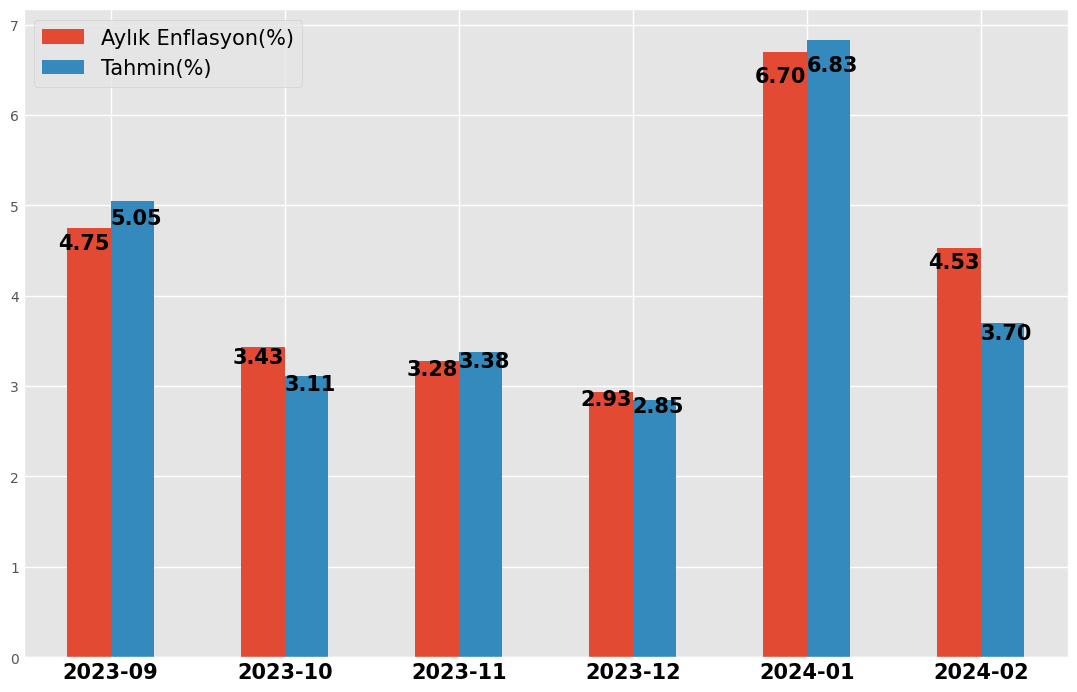

In [365]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=6,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)


plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [366]:
aralık=aylıktahmin.iloc[0,-1]
aralık = "{:.2f}".format(aralık)
sonu2023=yıllıktahmin.loc["2023-12-31","Ortalama"]
sonu2023="{:.2f}".format(sonu2023)
sonu2024=yıllıktahmin.loc["2024-12-31","Ortalama"]
sonu2024="{:.2f}".format(sonu2024)


Text(8.75, 2.3988999824590023, '2.52')

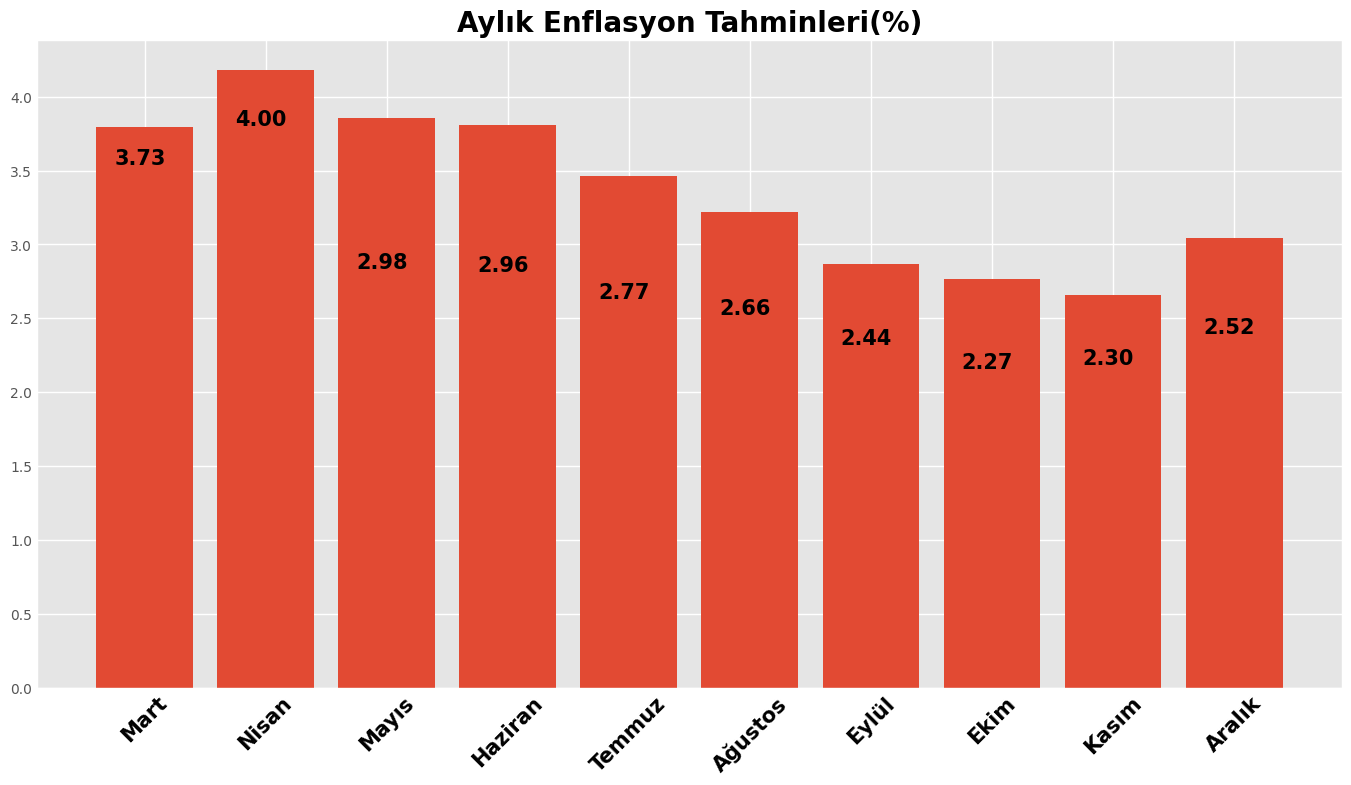

In [367]:
plt.figure(figsize=(15,8))
plt.bar(x=["Mart","Nisan","Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık"],height=aylıktahmin.iloc[:-3,-3])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-1])[:4],xy=(-0.25,aylıktahmin.iloc[0,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-1])[:4],xy=(0.75,aylıktahmin.iloc[1,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-1])[:4],xy=(1.75,aylıktahmin.iloc[2,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-1])[:4],xy=(2.75,aylıktahmin.iloc[3,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-1])[:4],xy=(3.75,aylıktahmin.iloc[4,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-1])[:4],xy=(4.75,aylıktahmin.iloc[5,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-1])[:4],xy=(5.75,aylıktahmin.iloc[6,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-1])[:4],xy=(6.75,aylıktahmin.iloc[7,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-1])[:4],xy=(7.75,aylıktahmin.iloc[8,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-1])[:4],xy=(8.75,aylıktahmin.iloc[9,-1]*0.95),fontweight="bold",fontsize=15)

